# Import Libraries

In [1]:
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# %%
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

# Import data

In [3]:
# Load train data
train = pd.read_csv('C:/Users/HP/OneDrive/Desktop/train.csv')
path = 'train.csv'

In [4]:
train.head()

Type   Age  Gender Color1   Color2   Color3 MaturitySize FurLength  \
0  Dog  84.0    Male  Brown    Cream  Unknown        Small        No   
1  Dog   1.0  Female  Black  Unknown  Unknown       Medium       Yes   
2  Dog   1.0    Male  Brown  Unknown  Unknown       Medium       Yes   
3  Dog   3.0    Male  Black  Unknown  Unknown       Medium       Yes   
4  Dog   8.0    Male  Brown  Unknown  Unknown        Large       Yes   

  Vaccinated Dewormed Sterilized   Health   Fee  \
0    Unknown      Yes         No  Healthy   0.0   
1         No      Yes         No  Healthy  50.0   
2         No       No         No  Healthy   0.0   
3    Unknown      Yes    Unknown  Healthy   0.0   
4        Yes      Yes         No  Healthy   0.0   

                                         Description  AdoptionSpeed  \
0  He is either lost or abandoned. Please contact...            4.0   
1  Hi, my name is Rose. I'm very friendly and am ...            3.0   
2  Puppy's age is unknown. My husband went mounta...            1.0   
3  Hi, I'm Randy, few weeks ago I got beaten by h...            4.0   
4  Abandoned puppy looking for a home. Hi, he is ...            3.0   

            Images        Breed  
0  3b178aa59-5.jpg      Terrier  
1  2fbf2cb7c-1.jpg  Mixed_Breed  
2  97f683e04-1.jpg  Mixed_Breed  
3  479500716-2.jpg  Mixed_Breed  
4  4a2270c3e-4.jpg  Mixed_Breed

In [5]:
# In this project, we will work with a  part of the dataset
N = 2000
train = train[N:3000]

In [6]:
train.shape

(1000, 17)

In [7]:
# Put data in a format
y_train = train['AdoptionSpeed']
X_train = train.drop(['AdoptionSpeed'], axis=1)
X_train.head()

Type  Age  Gender  Color1   Color2   Color3 MaturitySize FurLength  \
2000  Dog  5.0    Male  Golden   Yellow  Unknown        Small       Yes   
2001  Dog  4.0    Male   Black    Brown  Unknown       Medium        No   
2002  Dog  1.0    Male   Brown  Unknown  Unknown       Medium        No   
2003  Dog  5.0  Female   Black    Brown     Gray       Medium        No   
2004  Cat  5.0  Female   Black     Gray    White        Small       Yes   

     Vaccinated Dewormed Sterilized   Health  Fee  \
2000        Yes      Yes         No  Healthy  0.0   
2001         No       No         No  Healthy  0.0   
2002    Unknown  Unknown    Unknown  Healthy  0.0   
2003        Yes      Yes         No  Healthy  0.0   
2004    Unknown  Unknown    Unknown  Healthy  0.0   

                                            Description            Images  \
2000  This lovely boy, still a young puppy, was aban...   cf795bb00-5.jpg   
2001  Milo is a healthy 4 months old male puppy and ...   8a97062f5-1.jpg   
2002  Trying to find somebody who wants to adopt a m...  0753ad1cd-10.jpg   
2003  Opal is a very pretty dog with a mess of furry...   c2fe3684a-2.jpg   
2004  I rescued this cat around my house 1 month ago...   fb9b44c0c-1.jpg   

                     Breed  
2000           Mixed_Breed  
2001           Mixed_Breed  
2002  Jack_Russell_Terrier  
2003               Terrier  
2004                 Tabby

#HERE WE HAVE DEPENDENT VARIABLE AS 'ADOPTIONSPEED' AND REST OF THE VARIABLE ARE INDEPENDENT VARIABLES AND IT IS BEEN SPLITED

In [8]:
# Reading test dataset
test = pd.read_csv('C:/Users/HP/OneDrive/Desktop/test.csv')
test.head()

Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description           Images  \
0  kitten for adoption, pls call for enquiry, off...  5df99d229-2.jpg   
1  Stray puppy that came to my house. Obedient, w...  a08030c6f-2.jpg   
2  A kind person rescued her in an abandoned buil...  c8c3eb092-1.jpg   
3  Sweety as her name says is a sweet , fun and c...  56e91b142-1.jpg   
4  3 months old kitten for adoption. Female and p...  094636517-1.jpg   

                 Breed  
0  Domestic_Short_Hair  
1          Mixed_Breed  
2          Mixed_Breed  
3          Mixed_Breed  
4  Domestic_Short_Hair

In [9]:
#testshape
test.shape

(500, 16)

In [10]:
# data type
train.dtypes

Type              object
Age              float64
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
dtype: object

In [11]:
#finding NAN value
train.isna()

Type    Age  Gender  Color1  Color2  Color3  MaturitySize  FurLength  \
2000  False  False   False   False   False   False         False      False   
2001  False  False   False   False   False   False         False      False   
2002  False  False   False   False   False   False         False      False   
2003  False  False   False   False   False   False         False      False   
2004  False  False   False   False   False   False         False      False   
...     ...    ...     ...     ...     ...     ...           ...        ...   
2995  False  False   False   False   False   False         False      False   
2996  False  False   False   False   False   False         False      False   
2997  False  False   False   False   False   False         False      False   
2998  False  False   False   False   False   False         False      False   
2999  False  False   False   False   False   False         False      False   

      Vaccinated  Dewormed  Sterilized  Health    Fee  Description  \
2000       False     False       False   False  False        False   
2001       False     False       False   False  False        False   
2002       False     False       False   False  False        False   
2003       False     False       False   False  False        False   
2004       False     False       False   False  False        False   
...          ...       ...         ...     ...    ...          ...   
2995       False     False       False   False  False        False   
2996       False     False       False   False  False        False   
2997       False     False       False   False  False        False   
2998       False     False       False   False  False        False   
2999       False     False       False   False  False        False   

      AdoptionSpeed  Images  Breed  
2000          False   False  False  
2001          False   False  False  
2002          False   False  False  
2003          False   False  False  
2004          False   False  False  
...             ...     ...    ...  
2995          False   False  False  
2996          False   False  False  
2997          False   False  False  
2998          False   False  False  
2999          False   False  False  

[1000 rows x 17 columns]

In [12]:
#DESCRIBING TEST DATASET
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          500 non-null    object 
 1   Age           500 non-null    float64
 2   Gender        500 non-null    object 
 3   Color1        500 non-null    object 
 4   Color2        500 non-null    object 
 5   Color3        500 non-null    object 
 6   MaturitySize  500 non-null    object 
 7   FurLength     500 non-null    object 
 8   Vaccinated    500 non-null    object 
 9   Dewormed      500 non-null    object 
 10  Sterilized    500 non-null    object 
 11  Health        500 non-null    object 
 12  Fee           500 non-null    float64
 13  Description   500 non-null    object 
 14  Images        500 non-null    object 
 15  Breed         500 non-null    object 
dtypes: float64(2), object(14)
memory usage: 62.6+ KB


In [13]:
#DESCRIBING TRAIN DATASET
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 2000 to 2999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           1000 non-null   object 
 1   Age            1000 non-null   float64
 2   Gender         1000 non-null   object 
 3   Color1         1000 non-null   object 
 4   Color2         1000 non-null   object 
 5   Color3         1000 non-null   object 
 6   MaturitySize   1000 non-null   object 
 7   FurLength      1000 non-null   object 
 8   Vaccinated     1000 non-null   object 
 9   Dewormed       1000 non-null   object 
 10  Sterilized     1000 non-null   object 
 11  Health         1000 non-null   object 
 12  Fee            1000 non-null   float64
 13  Description    1000 non-null   object 
 14  AdoptionSpeed  1000 non-null   float64
 15  Images         1000 non-null   object 
 16  Breed          1000 non-null   object 
dtypes: float64(3), object(14)
memory usage: 132.9+ KB

In [14]:
test.describe()

Age         Fee
count  500.000000  500.000000
mean    12.430000   24.850000
std     19.195782   78.859147
min      0.000000    0.000000
25%      2.000000    0.000000
50%      4.000000    0.000000
75%     12.000000    0.000000
max    132.000000  700.000000

In [15]:
train.describe()

Age          Fee  AdoptionSpeed
count  1000.000000  1000.000000    1000.000000
mean     12.022000    22.414000       2.497000
std      18.666332    76.120029       1.155563
min       0.000000     0.000000       0.000000
25%       2.000000     0.000000       2.000000
50%       4.000000     0.000000       2.000000
75%      12.000000     0.000000       4.000000
max     122.000000   650.000000       4.000000

In [16]:
#CORRELATION BETWEEN TEST VARIABLES
test.corr()

Age       Fee
Age  1.000000  0.226283
Fee  0.226283  1.000000

In [17]:
#CORRELATION BETWEEN TRAIN VARIABLES
train.corr()

Age       Fee  AdoptionSpeed
Age            1.000000  0.068635       0.112447
Fee            0.068635  1.000000      -0.010569
AdoptionSpeed  0.112447 -0.010569       1.000000

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

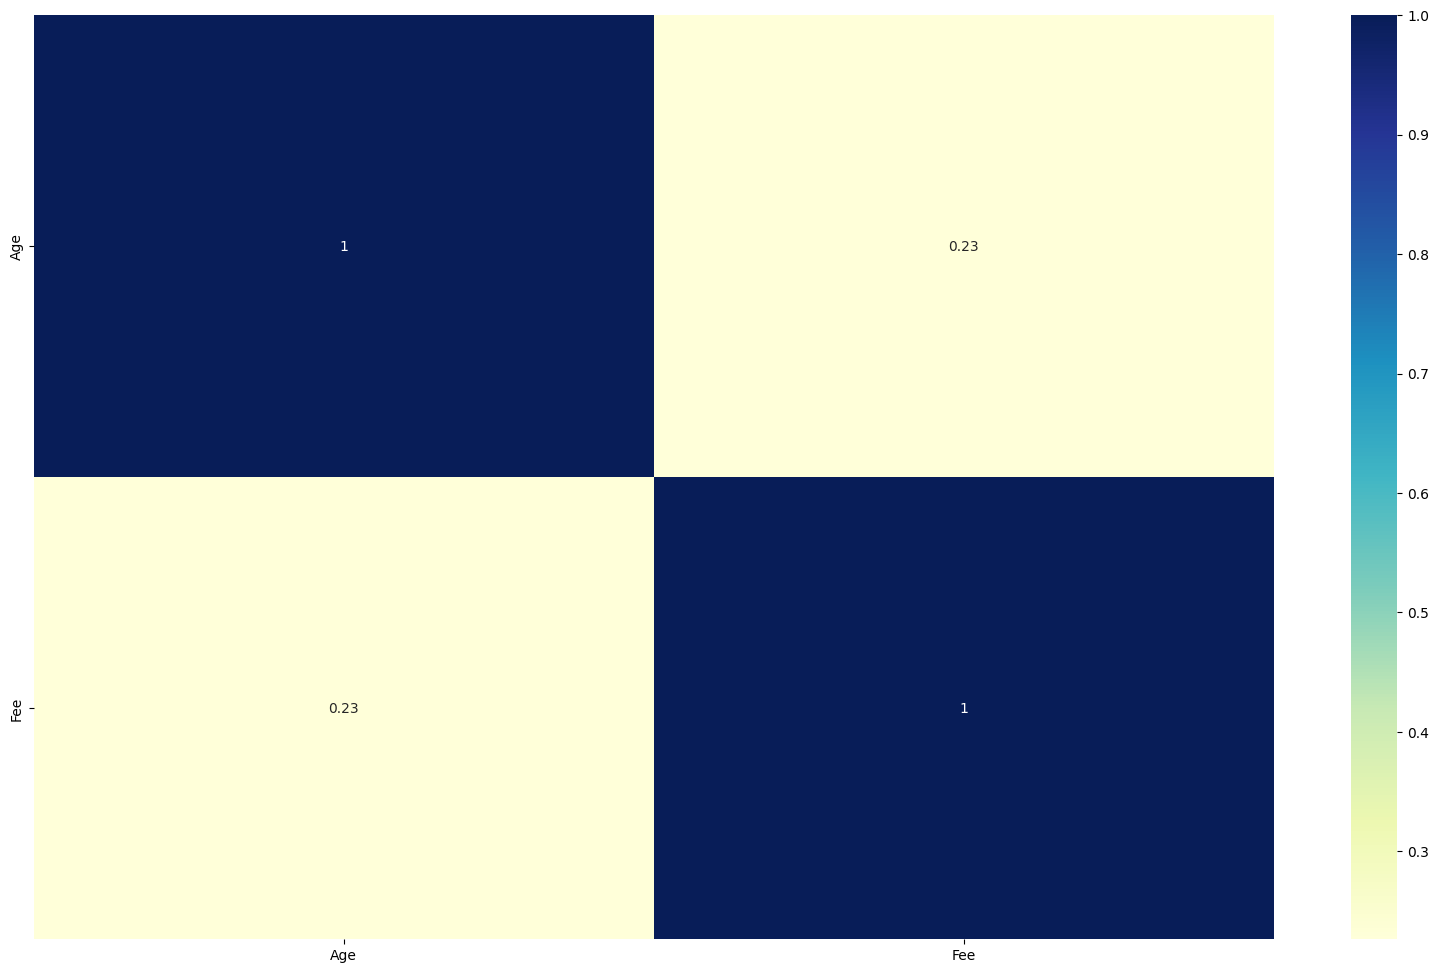

In [19]:
plt.figure(figsize=(20,12));
sns.heatmap(test.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:>

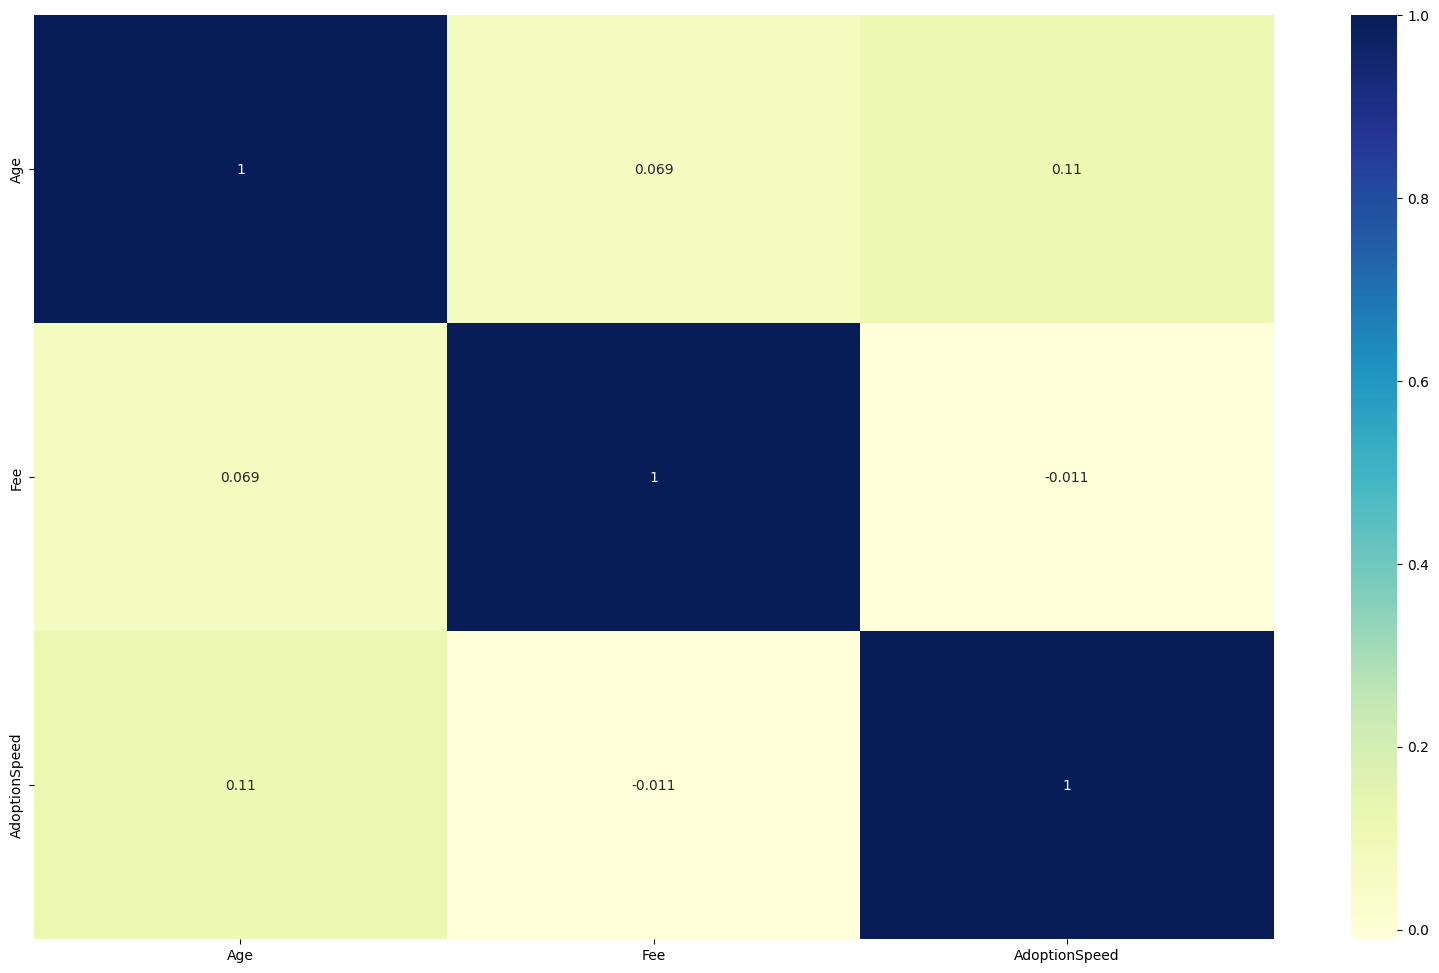

In [20]:
plt.figure(figsize=(20,12));
sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)

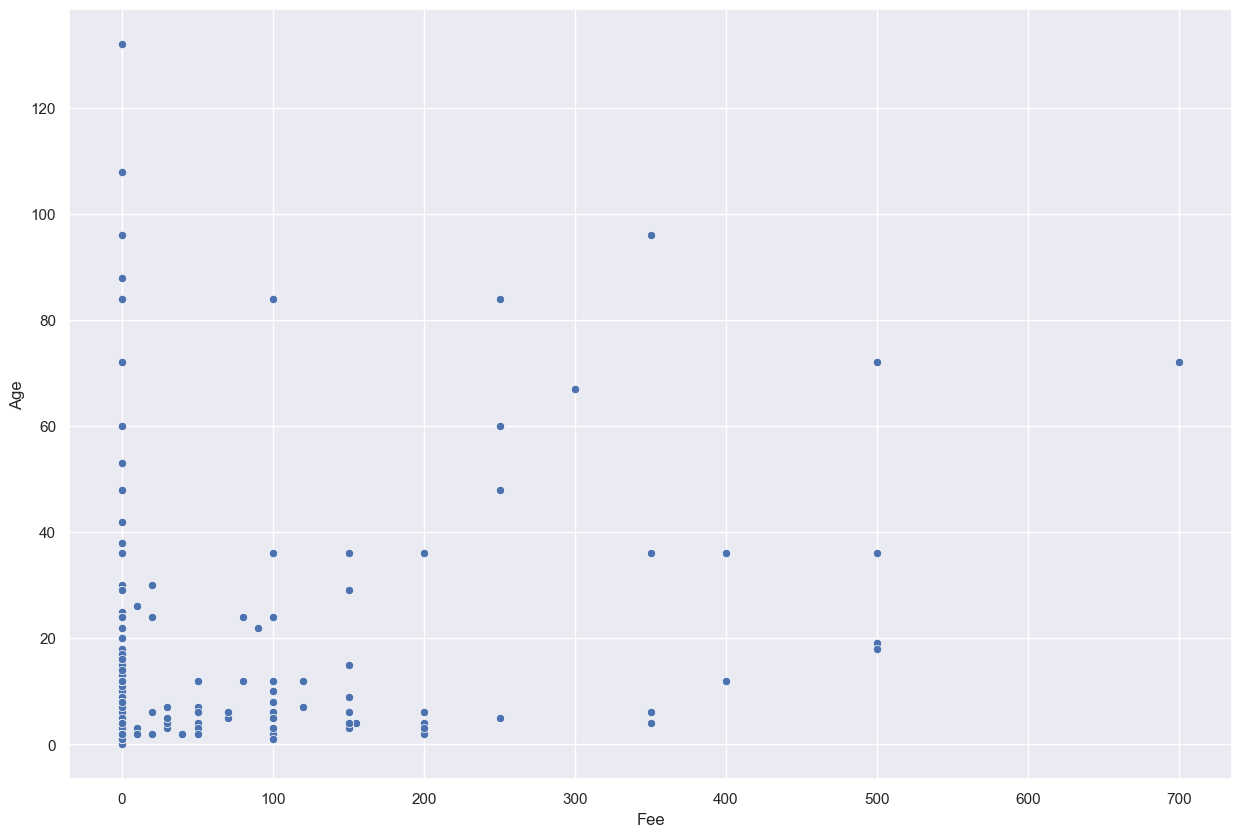

In [21]:
#ploting between fee and age
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="Fee",y="Age",data=test)
plt.show()

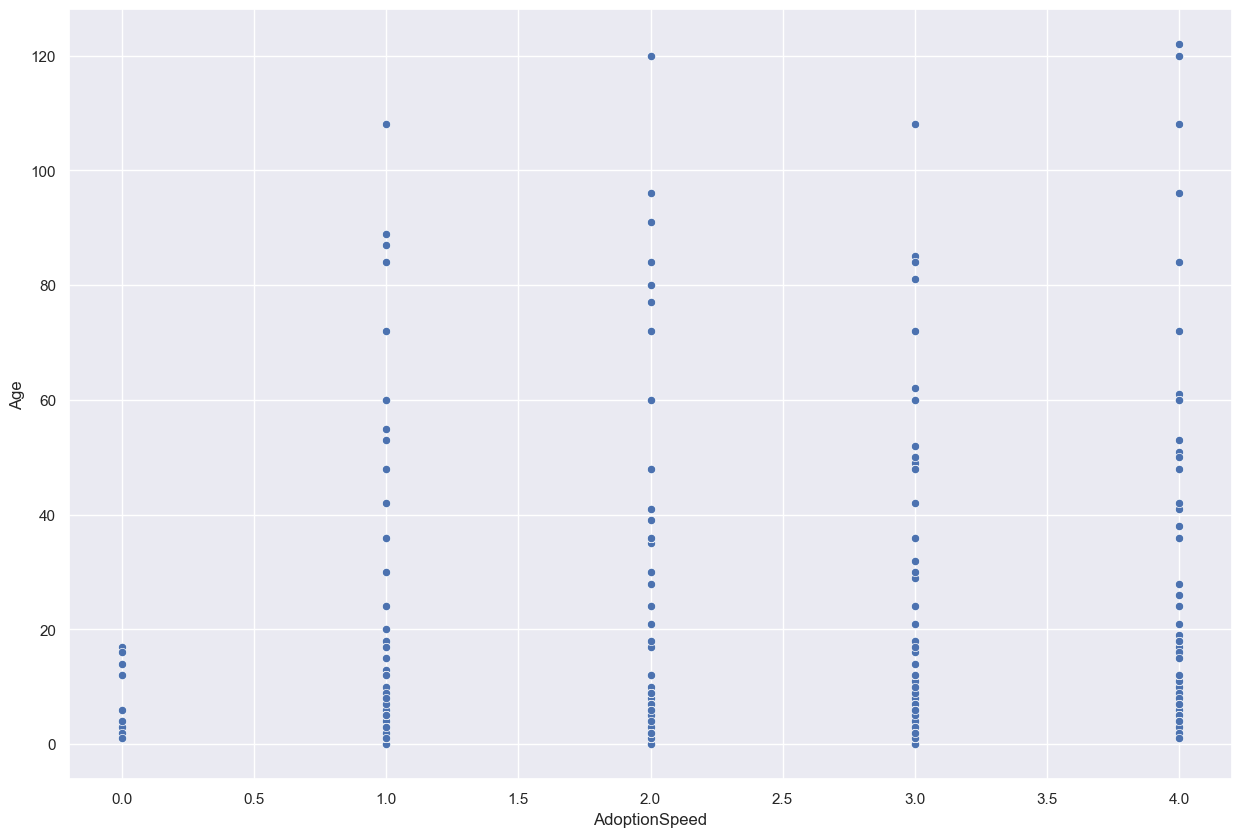

In [22]:
#ploting between adoptionspeed and age
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="AdoptionSpeed",y="Age",data=train)
plt.show()

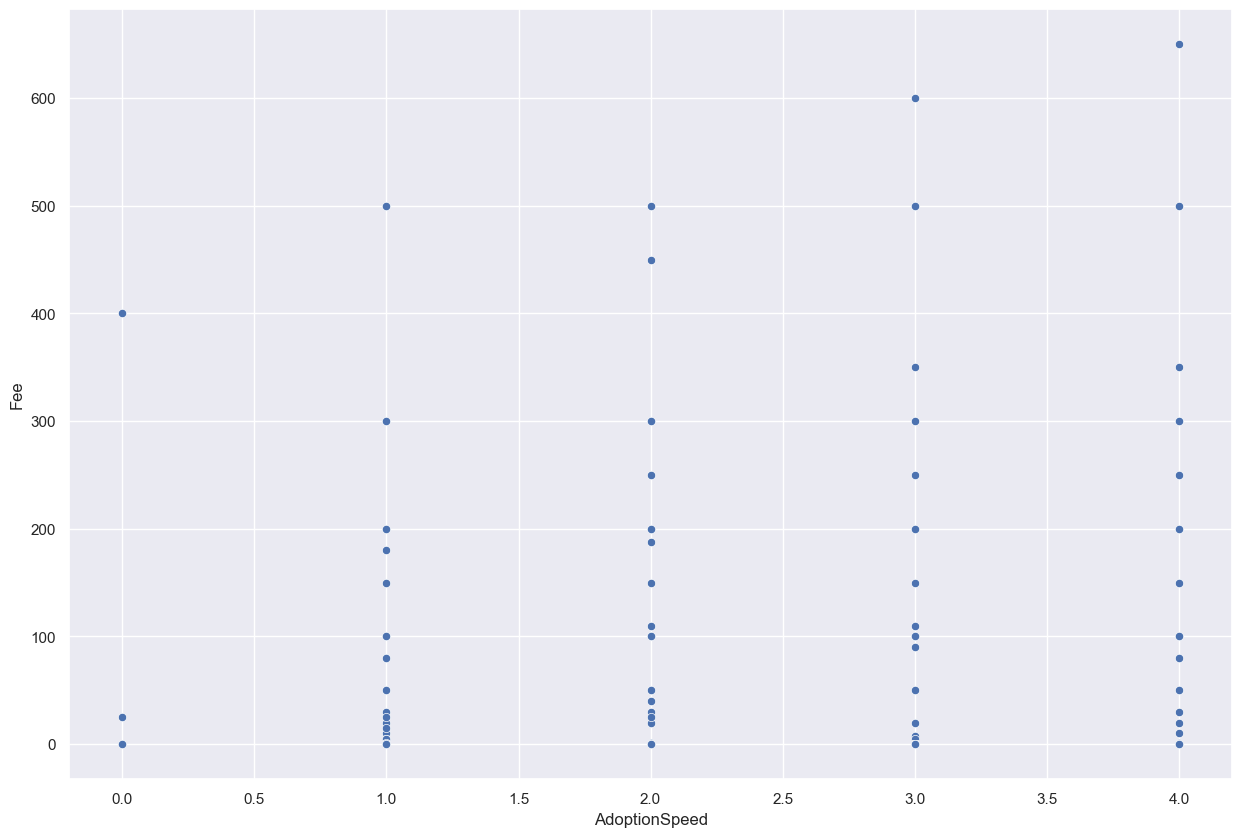

In [23]:
#ploting adoptionspeed and fee
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="AdoptionSpeed",y="Fee",data=train)
plt.show()

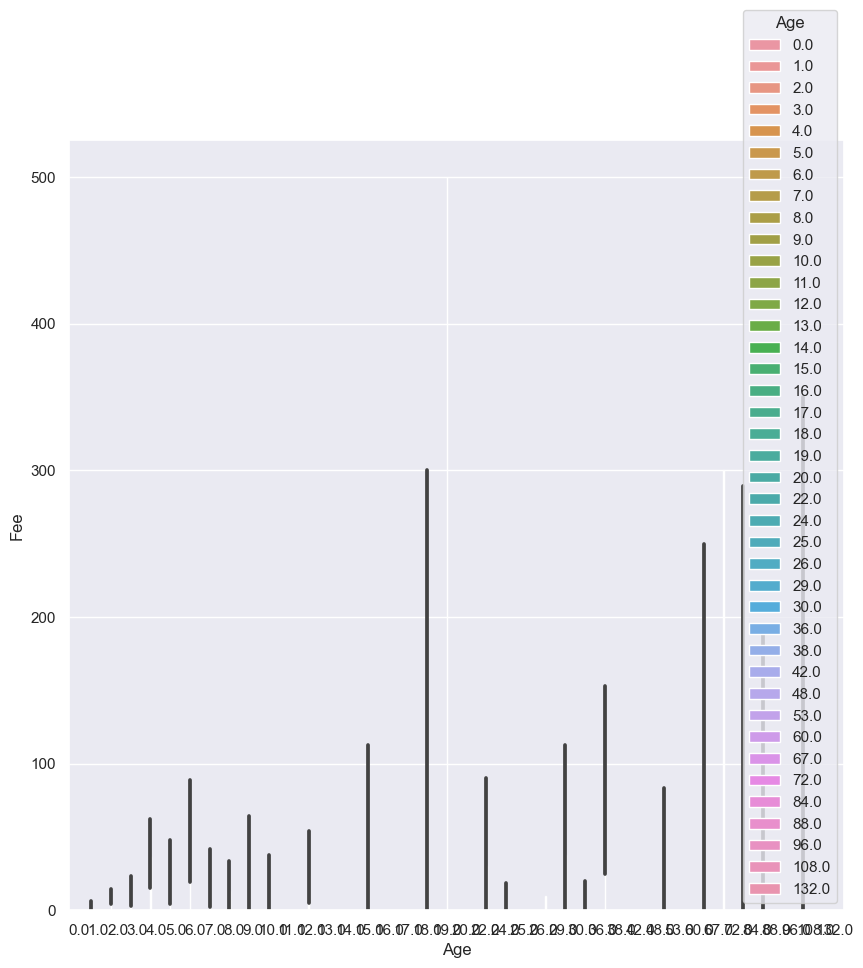

In [24]:
#making bar plot for age and fee
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x="Age",y="Fee",data=test,hue="Age")
plt.show()

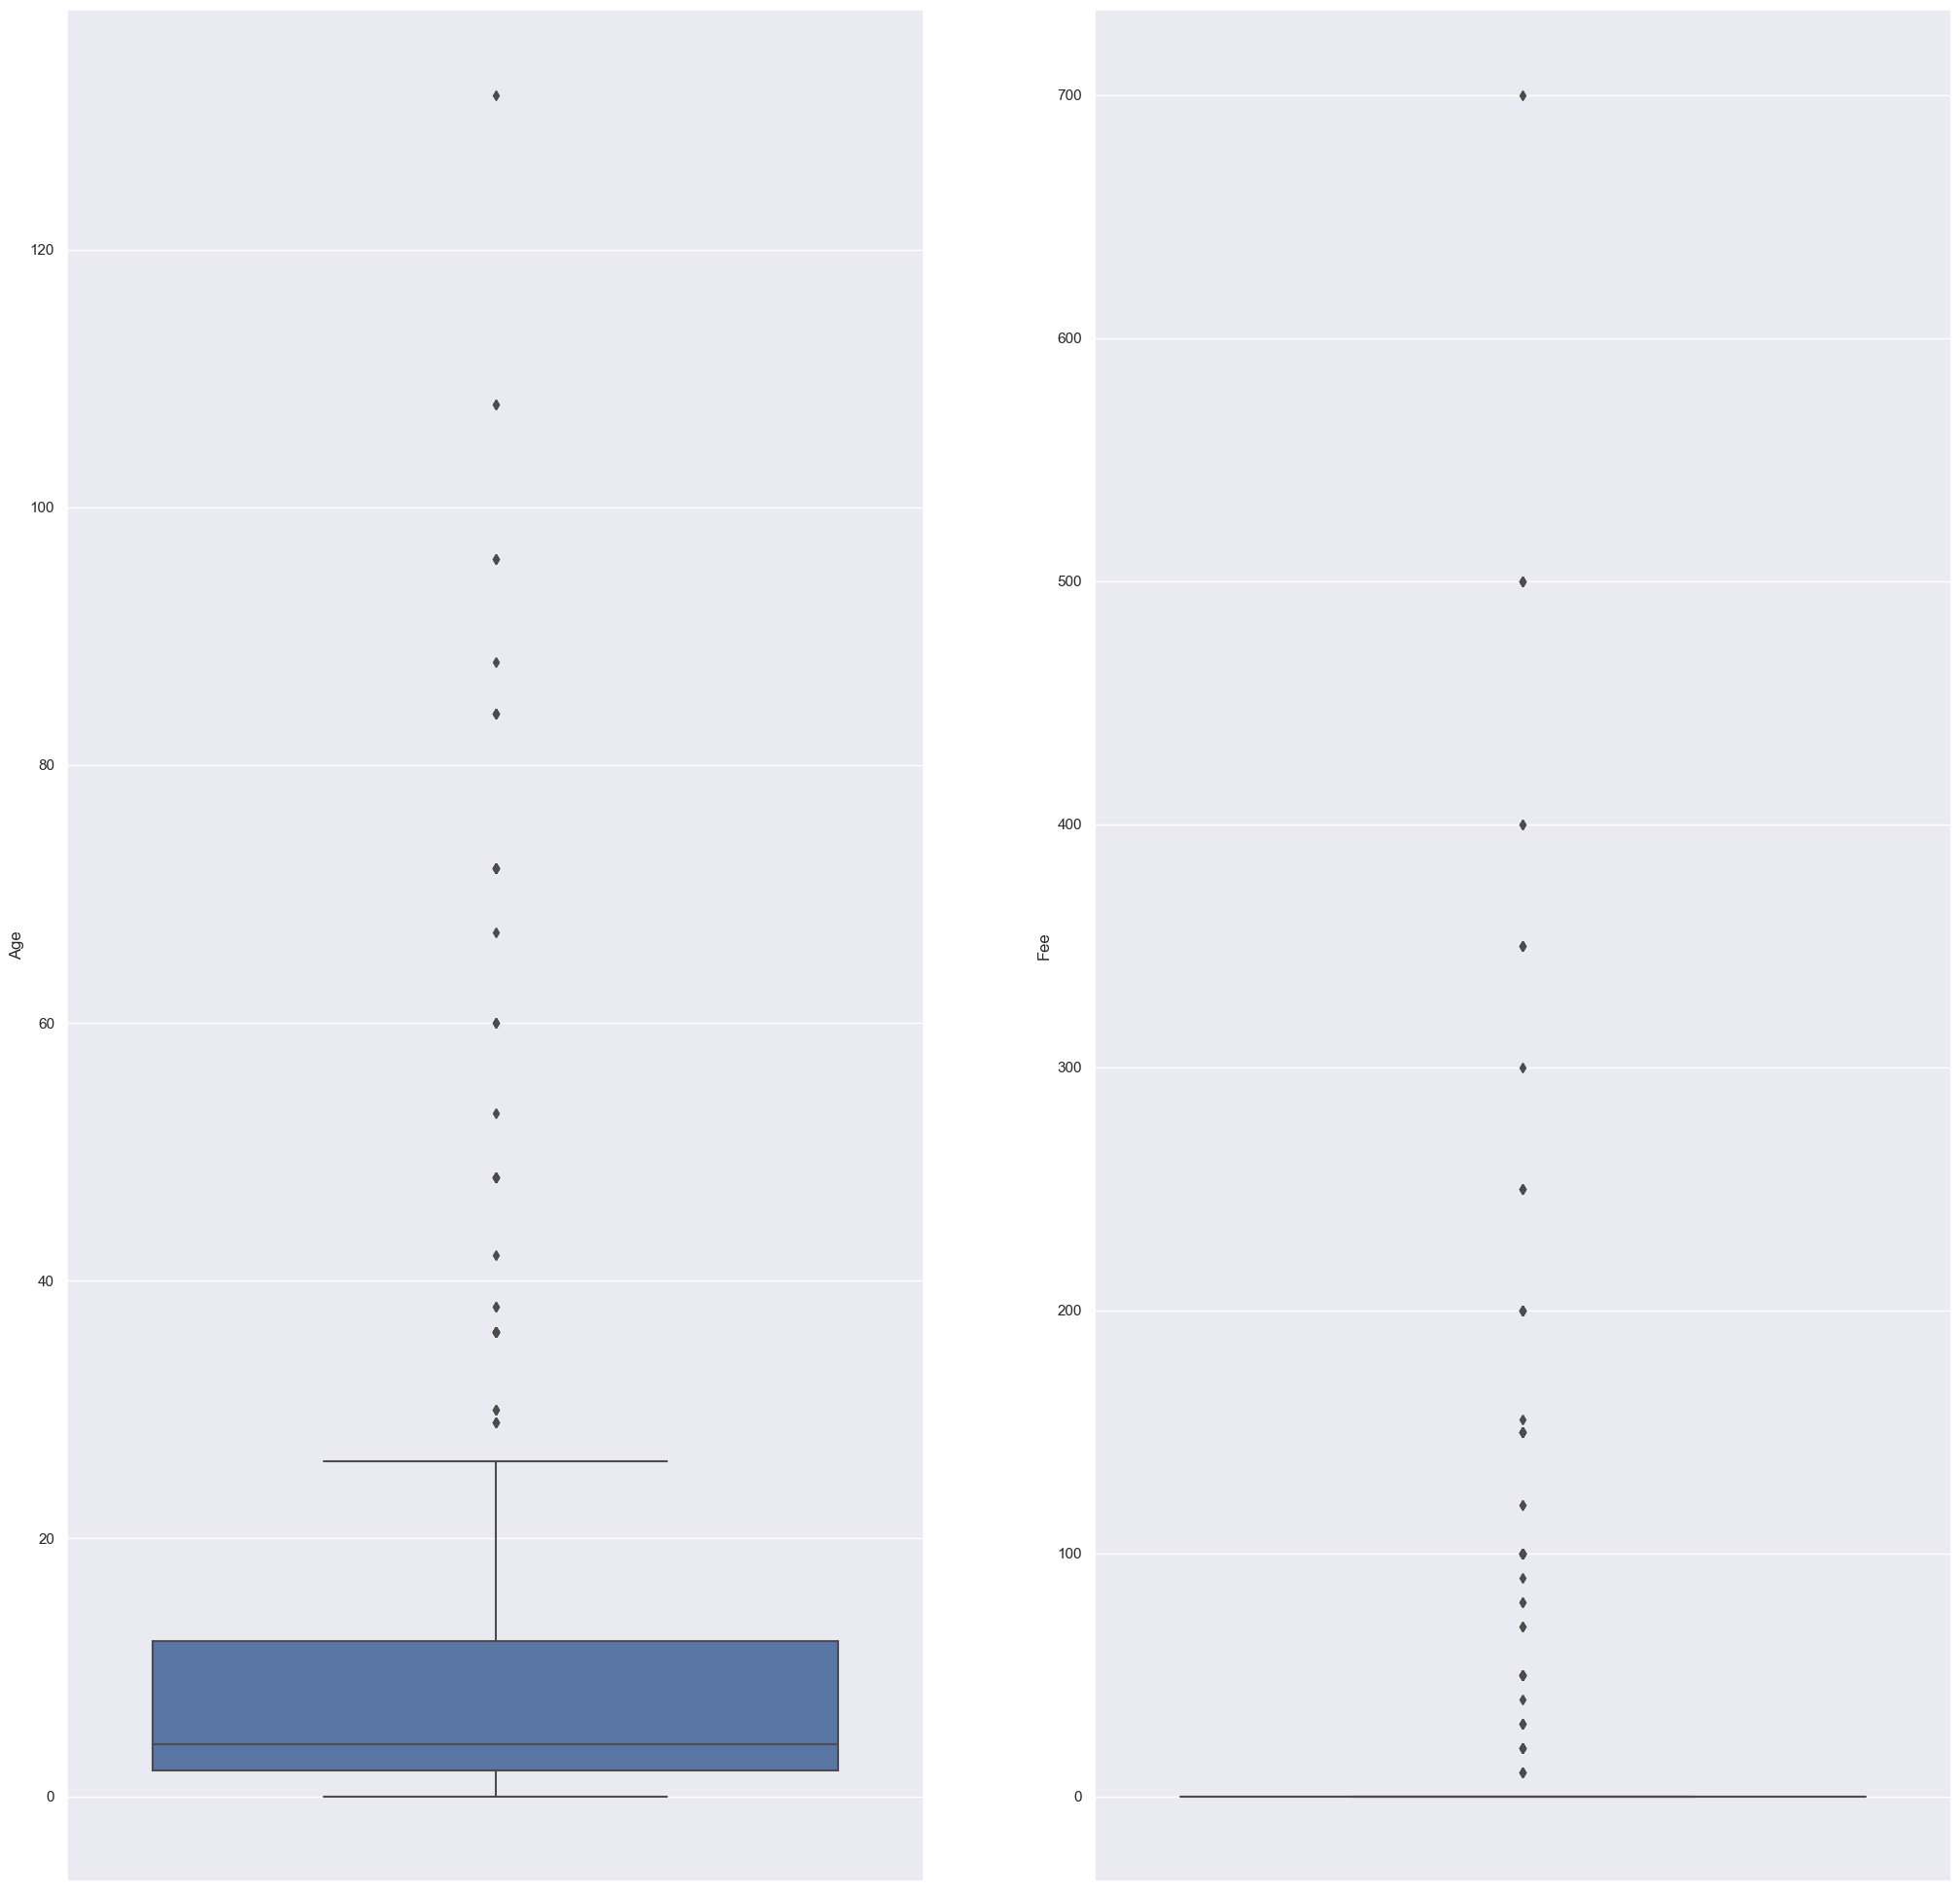

In [25]:
#box plot age
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
sns.boxplot(y=test["Age"])

#box plot fee
plt.subplot(1,2,2)
sns.boxplot(y=test["Fee"])
plt.show()

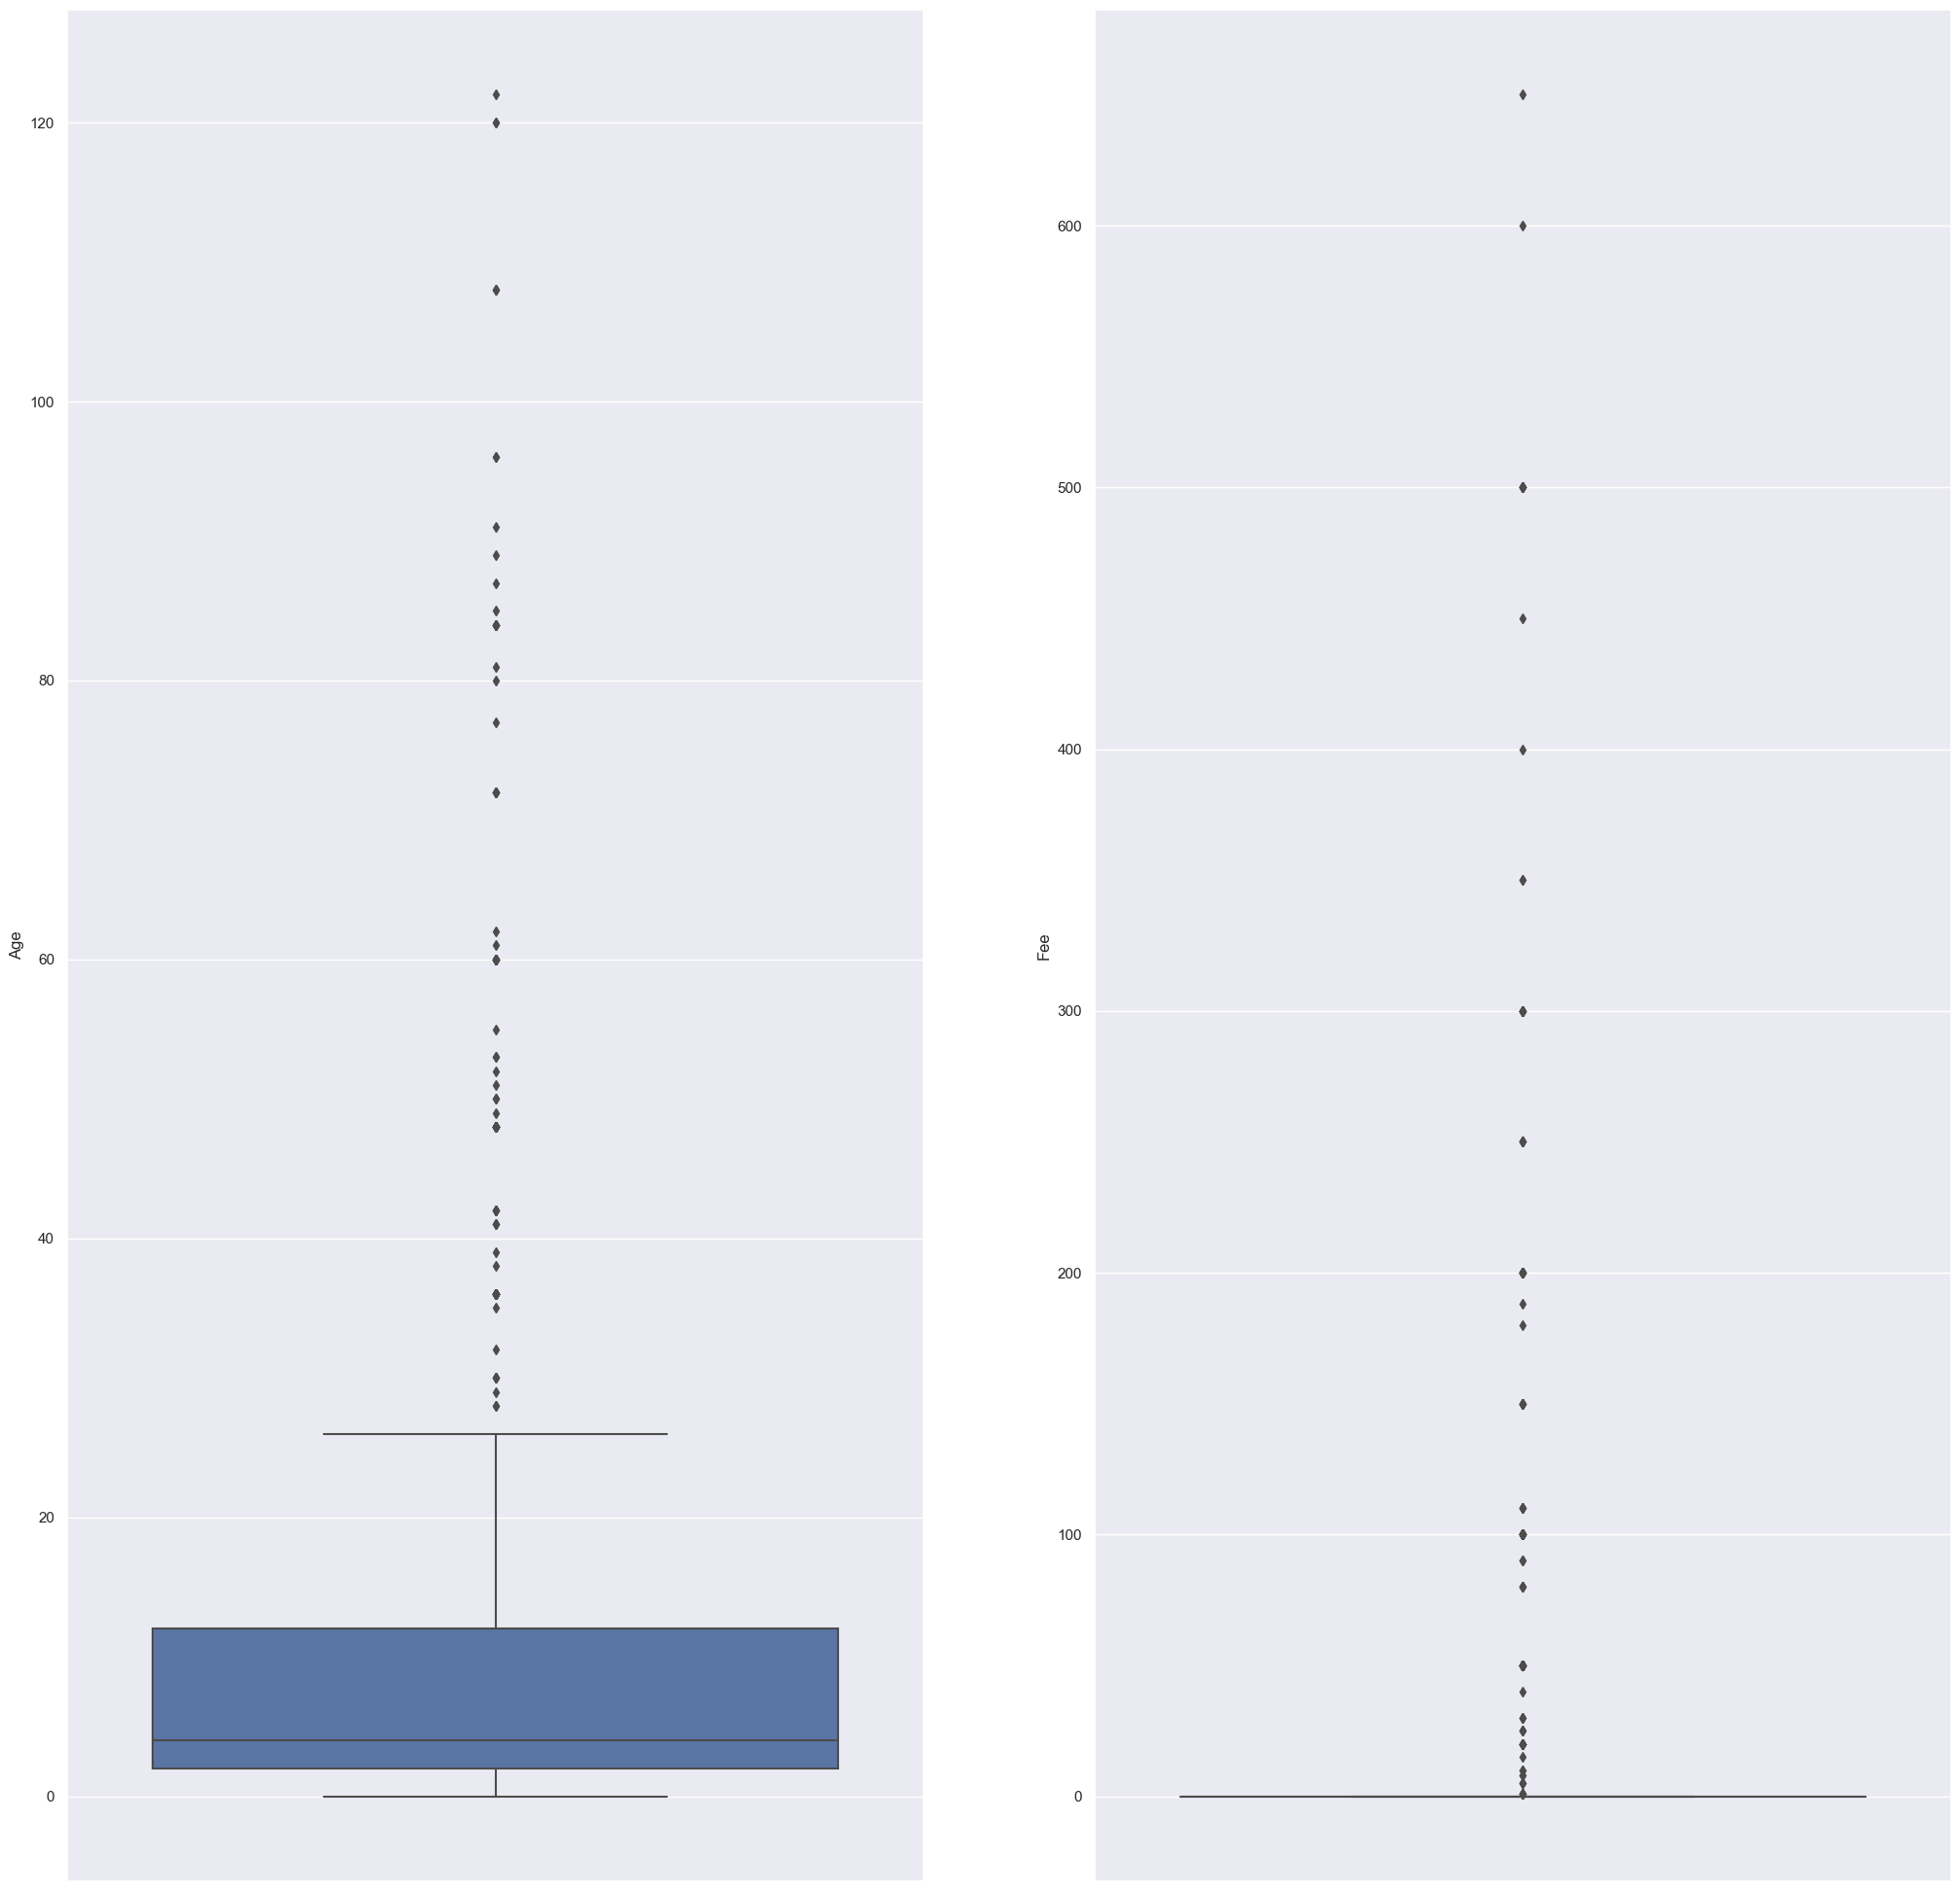

In [26]:
#box plot age
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
sns.boxplot(y=train["Age"])

#box plot fee
plt.subplot(1,2,2)
sns.boxplot(y=train["Fee"])
plt.show()

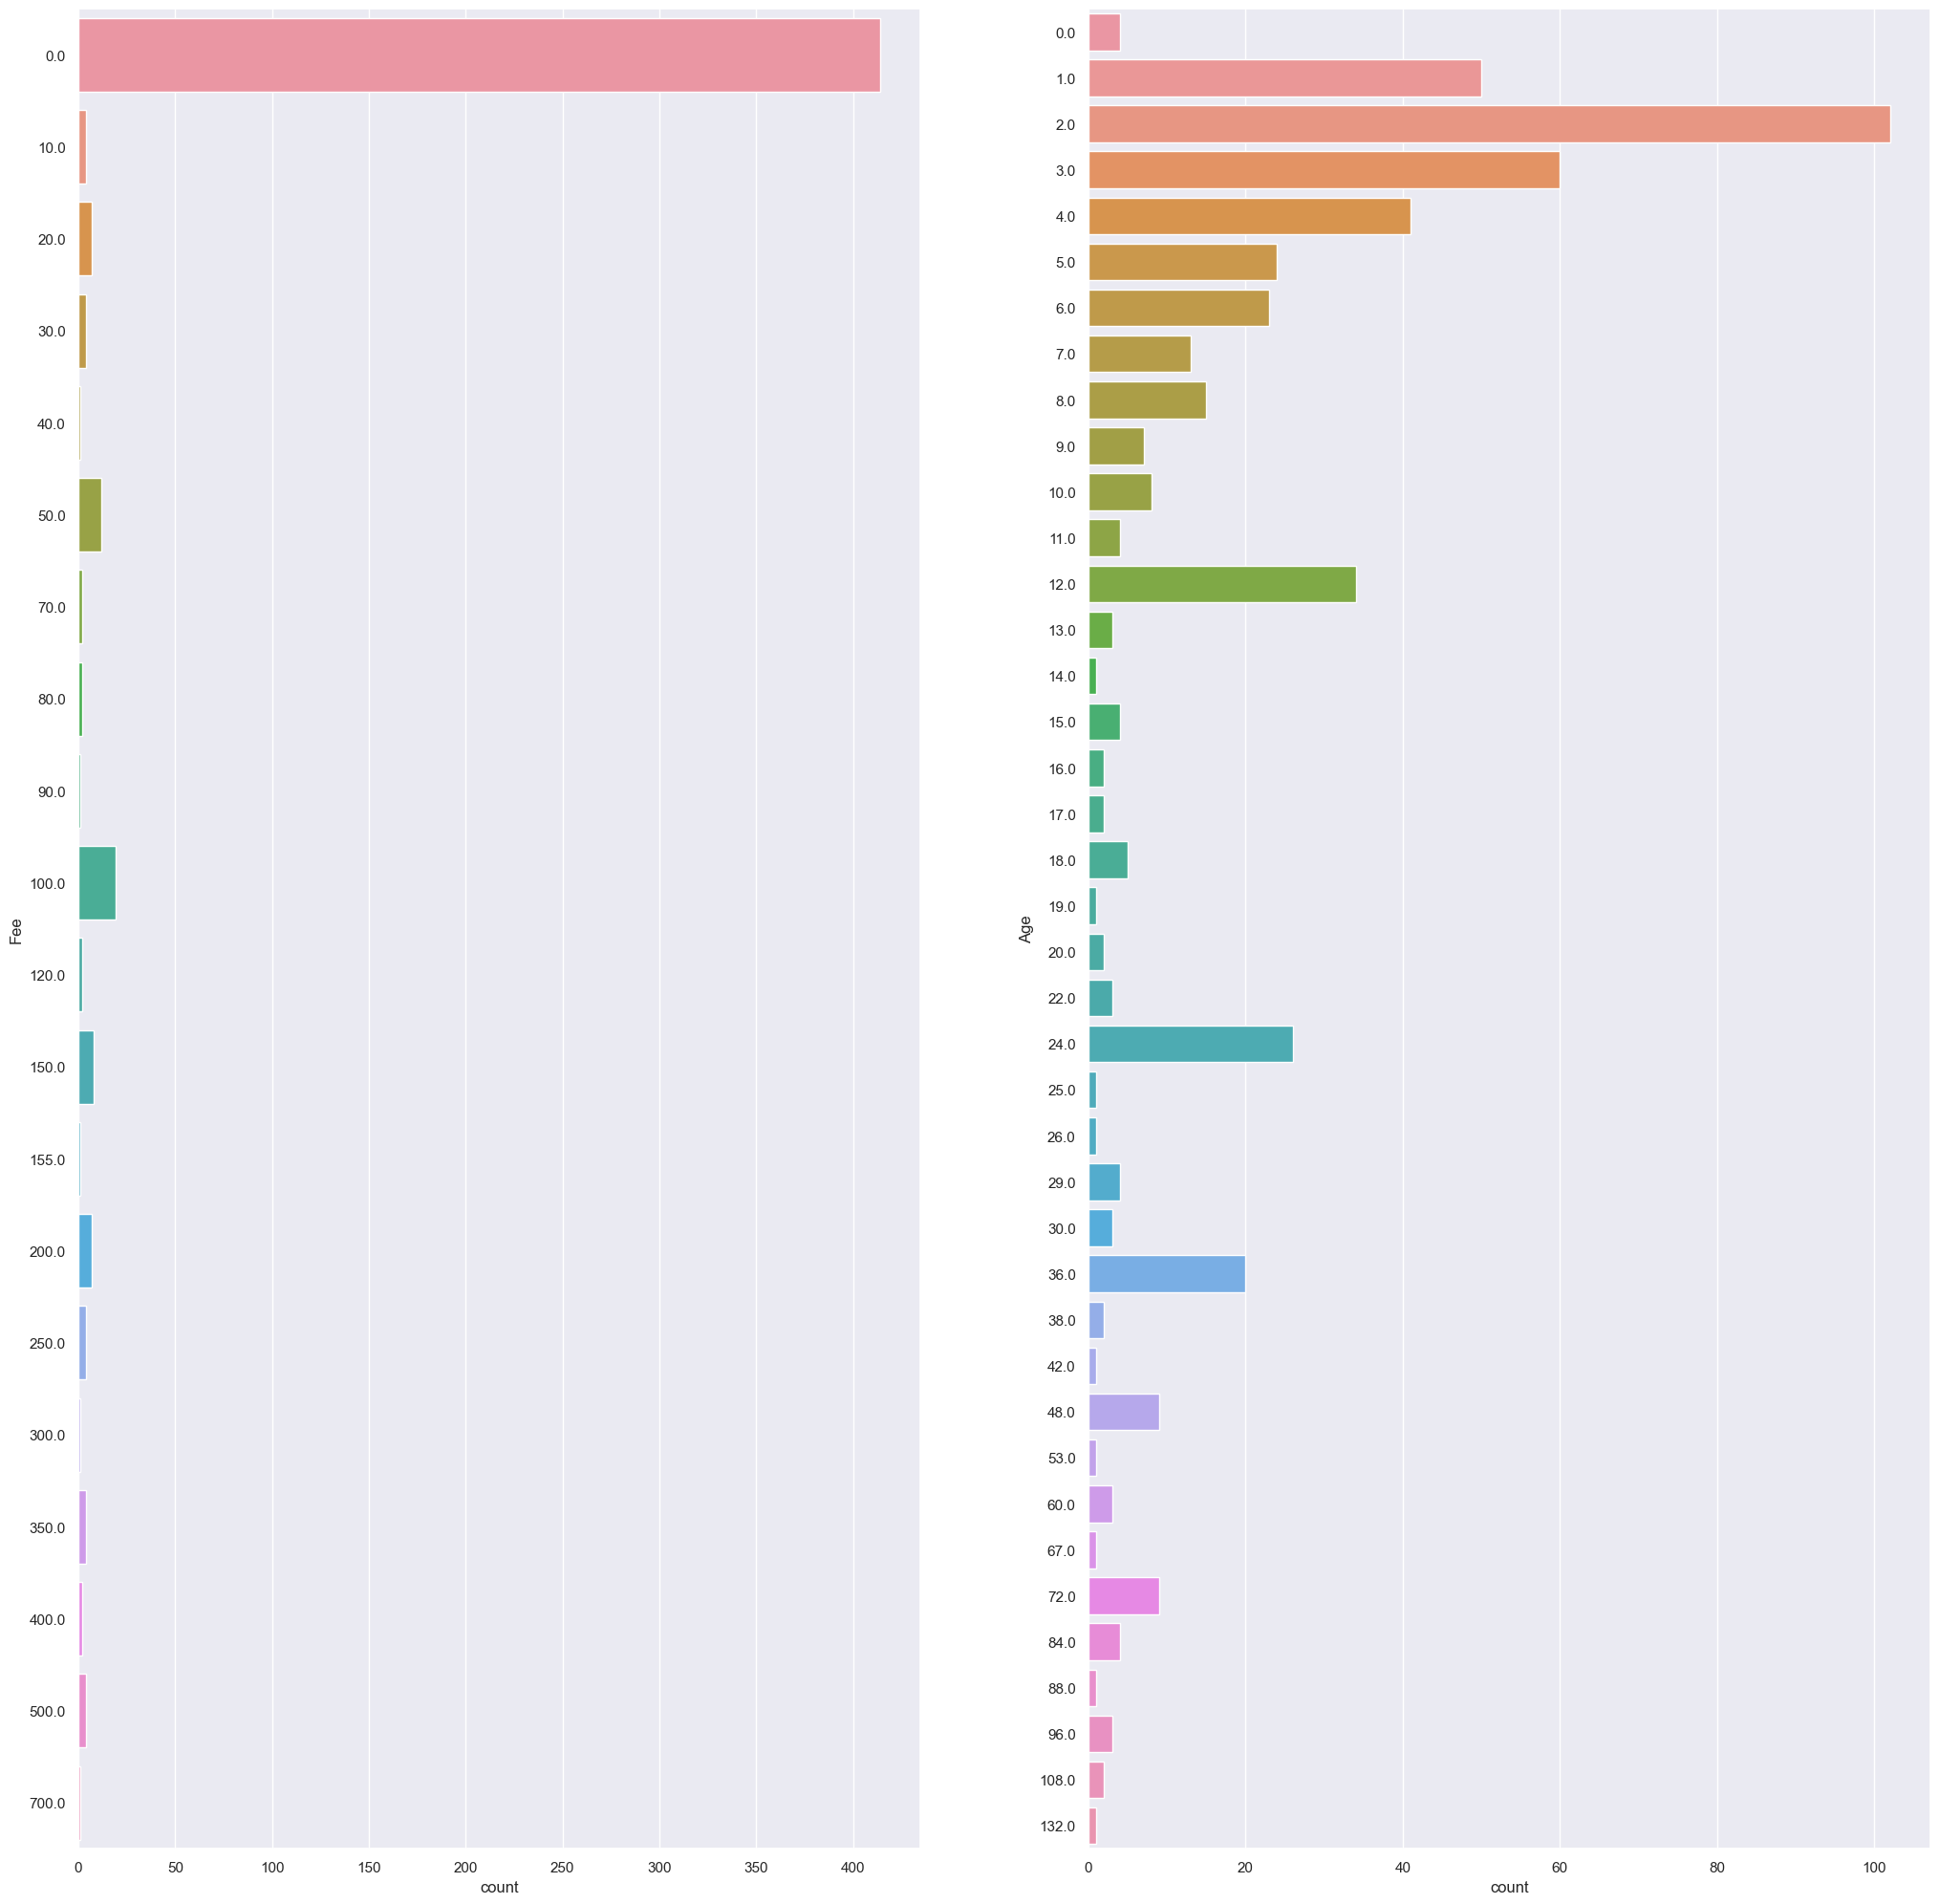

In [27]:
#count plot fee
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
sns.countplot(y=test["Fee"])

#count plot age
plt.subplot(1,2,2)
sns.countplot(y=test["Age"])
plt.show()

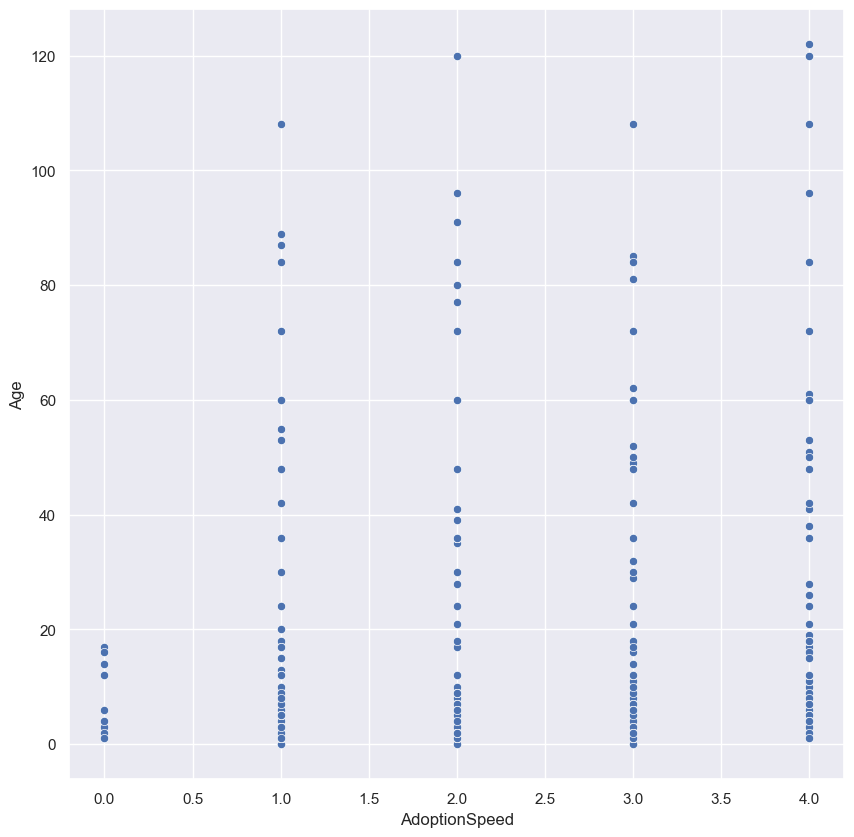

In [28]:
#ploting adoptionspeed vs age
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="AdoptionSpeed",y="Age",data=train)
plt.show()

In [29]:
#making bar plot for adoptionspeed and age
sns.set(rc={'figure.figsize':(25,25)})
sns.barplot(x="AdoptionSpeed",y="Age",data=train,hue="Age")
plt.show()

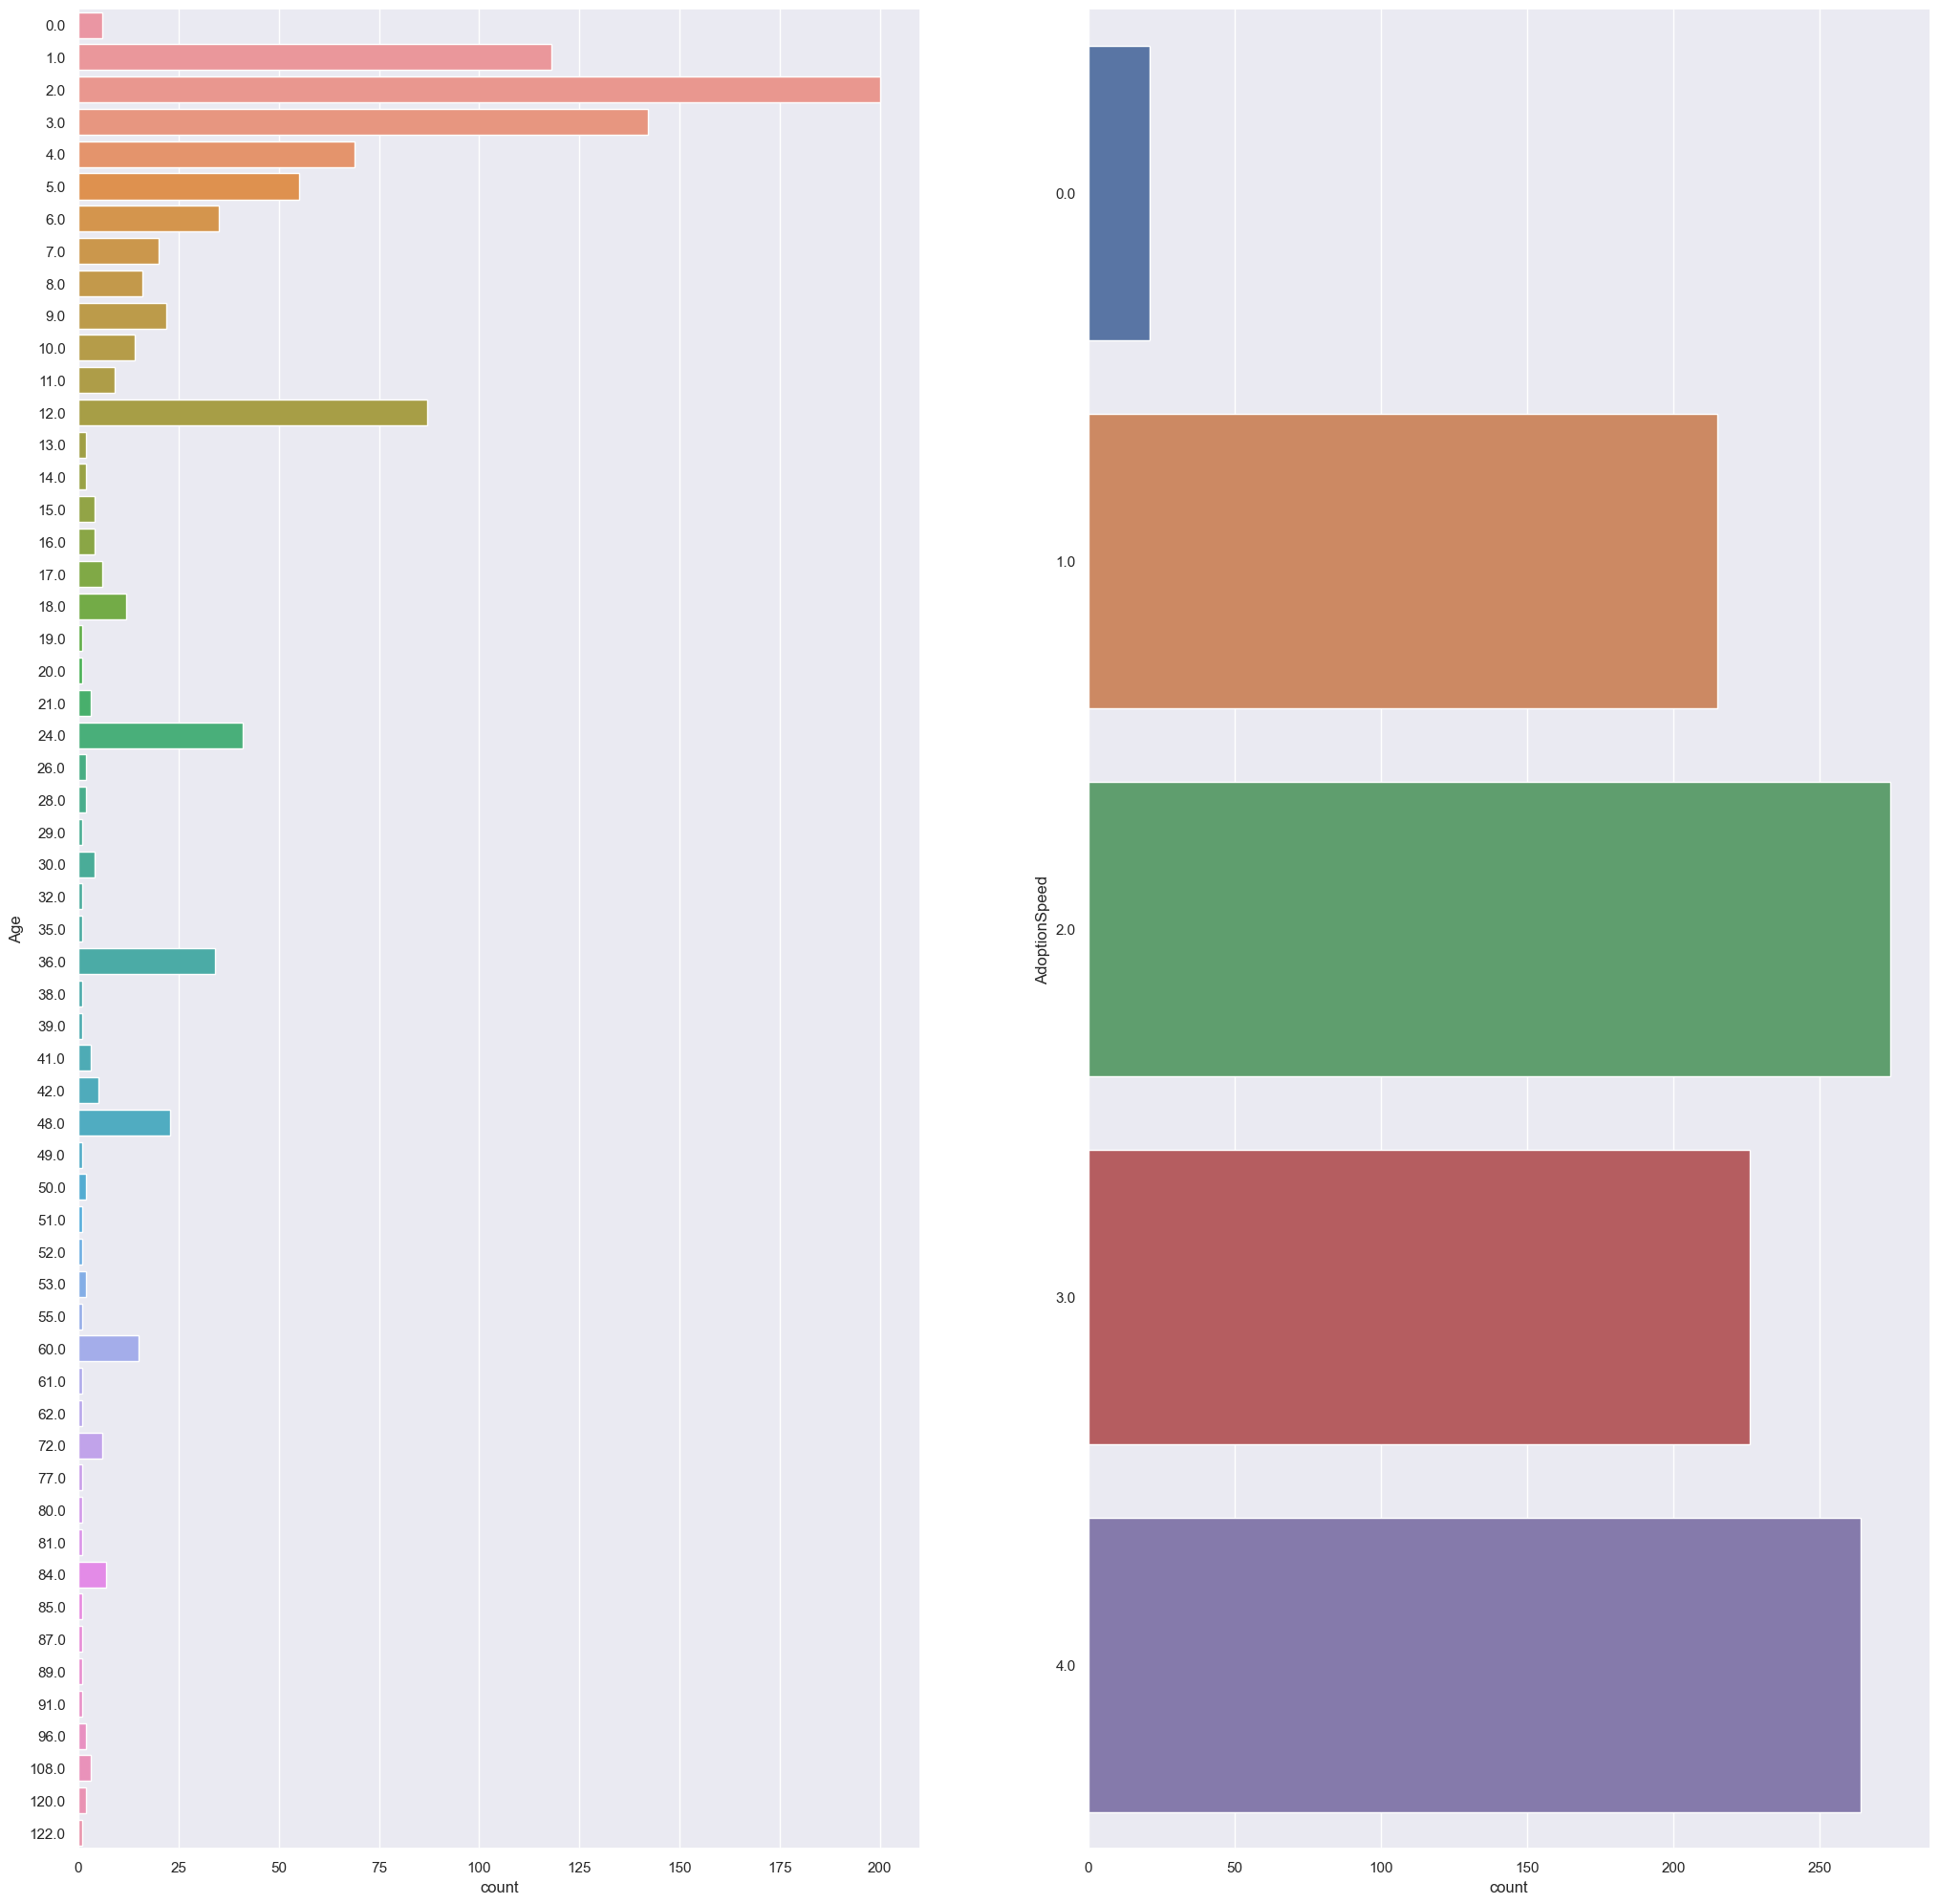

In [30]:
#count plot age
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
sns.countplot(y=train["Age"])

#count plot adoptionspeed
plt.subplot(1,2,2)
sns.countplot(y=train["AdoptionSpeed"])
plt.show()

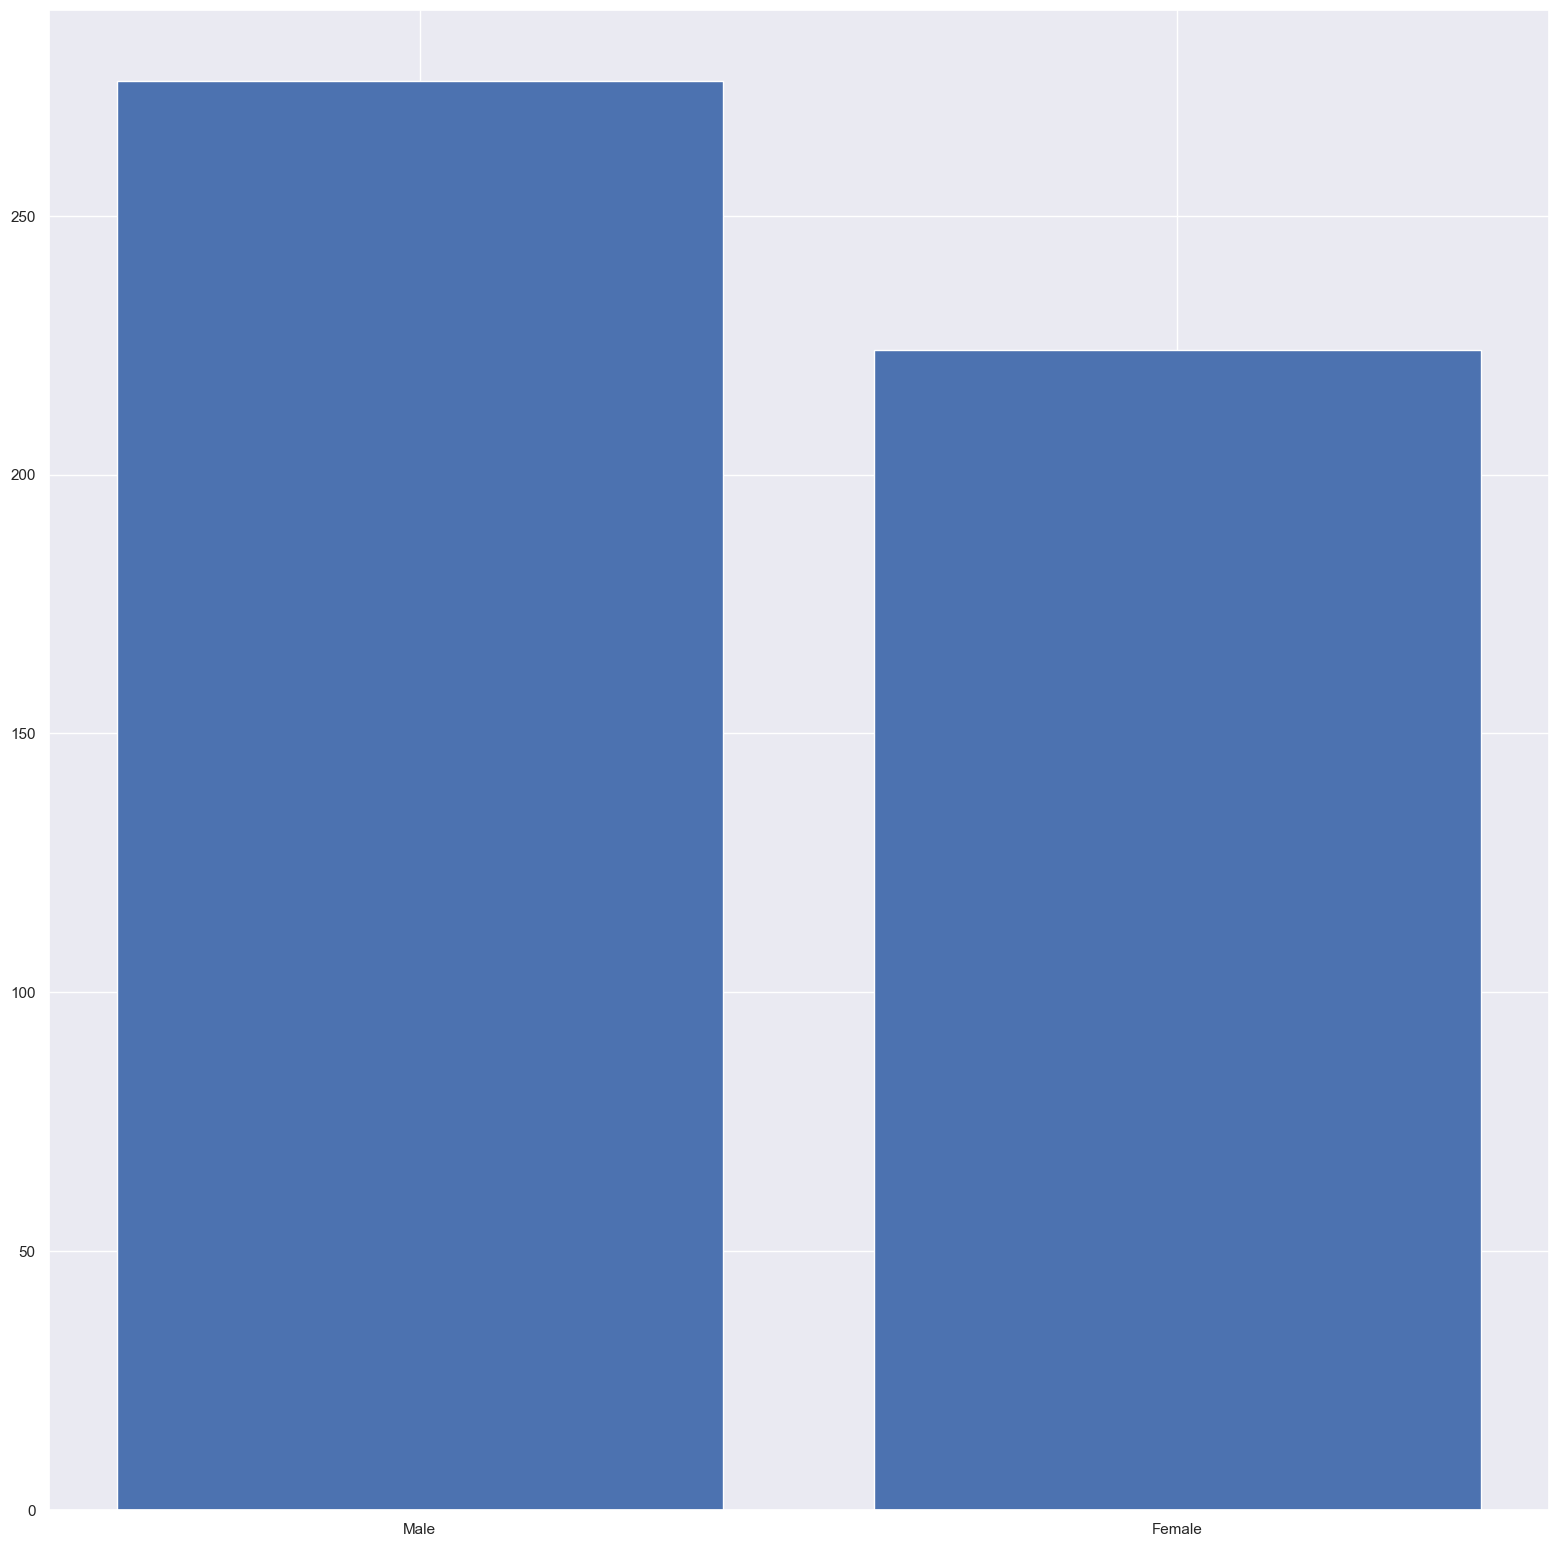

In [31]:
#count of the number of male and female in a test set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])
gender = ["Male", "Female"]
ax.bar(gender,test["Gender"].value_counts())
plt.show()

In [32]:
#lineplot between on age vs adoptionspeed
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Age",y="AdoptionSpeed",data=train,color="r")
plt.show()

In [33]:
# Notice : we do not have nan values

In [34]:
# Build the image list of the training set 

img_dir = "train_images3/"
X_train['Images'] = [img_dir+img for img in train['Images']]

In [35]:
len(X_train['Images'])

1000

In [36]:
from skimage import io

# Read the first image of the list
img = io.imread(X_train['Images'][2000])
# have a look to the image
plt.imshow(img)

In [37]:
!pip3 install opencv-python

In [38]:
# convert the image to grey levels 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#OpenCV (Open Source Computer Vision Library) is a library of programming functions mainly aimed at real-time computer vision. OpenCV provides a wide range of computer vision algorithms and techniques, such as image processing, object detection, feature extraction, camera calibration etc.

In [39]:
# compute SIFT detector and descriptors
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)

#cv2.SIFT_create() function to create a SIFT (Scale-Invariant Feature Transform) object, which is a feature detection algorithm used to describe local features in images.
#The detectAndCompute() method is then called on the SIFT object to detect keypoints and compute their corresponding descriptors for the input image.

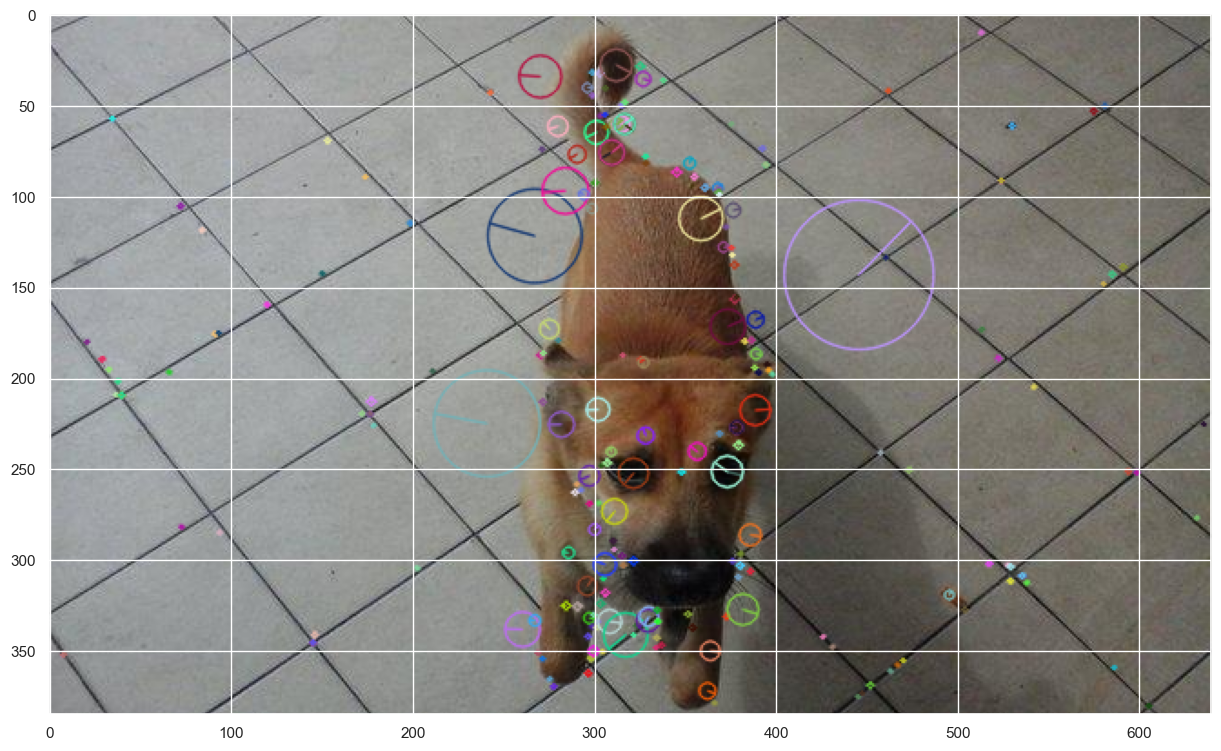

In [40]:
# plot image and descriptors
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

#This code snippet draws the detected keypoints on the original image using the cv2.drawKeypoints() function and then displays the resulting image using plt.imshow() function.

## Extract features and build BOFs

In [41]:
# step 1: extract the SIFTs of each image

def extract_SIFT(img_lst):
    nbSIFTs = 0    # Nomber of SIFTs
    SIFTs = []  # List of SIFTs descriptors 
    #dimImgs = []   # Nb of descriptors associated to each images

    for pathImg in tqdm(img_lst, position=0, leave=True): 
        img = io.imread(pathImg)
        if len(img.shape)==2: # this is a grey level image
            gray = img
        else: # we expect the image to be a RGB image or RGBA
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(gray, None)
        if len(kp) == 0 and img.shape[2]==4: #some images are mask on alpha channel: we thus extract this channel if not kpts have been detected
            gray = img[:,:,3]
            sift = cv2.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)
        
        nbSIFTs += des.shape[0]
        SIFTs.append(des)
        #dimImages.append(des.shape[0])
    return nbSIFTs, SIFTs#, dimImages

In [42]:
nbSIFTs, SIFTs = extract_SIFT(X_train['Images'])
print('nbSifts: ', nbSIFTs)

100%|██████████| 1000/1000 [00:59<00:00, 16.89it/s]

nbSifts:  697706


#This code snippet extracts SIFT features from the images in the training set X_train['Images'] using the extract_SIFT() function and then prints the total number of extracted SIFT features nbSIFTs.

In [43]:
# Step 2: clusterize the SIFT
from sklearn.cluster import MiniBatchKMeans

def clusterize(SIFTs, nb_img_features=5, verbose=False):
    clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)   # nb_img_features is a hyperparameter
    # learning of the clustering
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    clusterizer.fit(flat_list)
    # we now know the label of each SIFT descriptor
    return clusterizer

#The clusterize() function takes a list of SIFT descriptors SIFTs and an integer nb_img_features that represents the number of clusters (i.e., the number of image features we want to extract).
#The function then creates a MiniBatchKMeans object with n_clusters=nb_img_features and fits the model with the concatenated list of all SIFT descriptors in SIFTs. The resulting model will assign a label to each SIFT descriptor, which will be used later to build the Bag-of-Features representation of an image.
#The function returns the trained MiniBatchKMeans object.

In [44]:
clusterizer = clusterize(SIFTs, verbose=True)

shape: (1272, 128) (1512, 128)
shape: (2897, 128) (4409, 128)
shape: (861, 128) (5270, 128)
shape: (367, 128) (5637, 128)
shape: (442, 128) (6079, 128)
shape: (808, 128) (6887, 128)
shape: (224, 128) (7111, 128)
shape: (78, 128) (7189, 128)
shape: (1850, 128) (9039, 128)
shape: (1006, 128) (10045, 128)
shape: (1202, 128) (11247, 128)
shape: (333, 128) (11580, 128)
shape: (907, 128) (12487, 128)
shape: (157, 128) (12644, 128)
shape: (284, 128) (12928, 128)
shape: (181, 128) (13109, 128)
shape: (1271, 128) (14380, 128)
shape: (266, 128) (14646, 128)
shape: (314, 128) (14960, 128)
shape: (614, 128) (15574, 128)
shape: (643, 128) (16217, 128)
shape: (944, 128) (17161, 128)
shape: (1239, 128) (18400, 128)
shape: (926, 128) (19326, 128)
shape: (1362, 128) (20688, 128)
shape: (626, 128) (21314, 128)
shape: (2011, 128) (23325, 128)
shape: (1144, 128) (24469, 128)
shape: (502, 128) (24971, 128)
shape: (485, 128) (25456, 128)
shape: (252, 128) (25708, 128)
shape: (150, 128) (25858, 128)
shape: (

In [45]:
clusterizer.get_params

<bound method BaseEstimator.get_params of MiniBatchKMeans(n_clusters=5)>

In [46]:
# Step 3: build the BOW representation of each images (i.e. construction of the BOFs)

def build_BOFs(SIFTs, clusterizer, verbose=False):
    ok, nok = 0, 0
    #BOF initialization
    nb_img_features = clusterizer.get_params()['n_clusters']
    BOFs = np.empty(shape=(0, nb_img_features), dtype=int)

    # Build label list
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    labels = clusterizer.predict(flat_list)

    # loop on images
    i = 0 # index for the loop on SIFTs
    for des in SIFTs:
        #initialisation of the bof for the current image
        tmpBof = np.array([0]*nb_img_features)
        j = 0
        # for every SIFT of the current image:
        nbs = des.shape[0]
        while j < nbs:
            tmpBof[labels[i]] += 1
            j+=1
            i+=1
        BOFs = np.concatenate((BOFs, tmpBof.reshape(1,-1)), axis=0)
    if verbose:
        print("BOFs : ", BOFs)
    
    return BOFs

In [47]:
BOFs = build_BOFs(SIFTs, clusterizer, verbose=True)
BOFs.shape

shape: (1272, 128) (1512, 128)
shape: (2897, 128) (4409, 128)
shape: (861, 128) (5270, 128)
shape: (367, 128) (5637, 128)
shape: (442, 128) (6079, 128)
shape: (808, 128) (6887, 128)
shape: (224, 128) (7111, 128)
shape: (78, 128) (7189, 128)
shape: (1850, 128) (9039, 128)
shape: (1006, 128) (10045, 128)
shape: (1202, 128) (11247, 128)
shape: (333, 128) (11580, 128)
shape: (907, 128) (12487, 128)
shape: (157, 128) (12644, 128)
shape: (284, 128) (12928, 128)
shape: (181, 128) (13109, 128)
shape: (1271, 128) (14380, 128)
shape: (266, 128) (14646, 128)
shape: (314, 128) (14960, 128)
shape: (614, 128) (15574, 128)
shape: (643, 128) (16217, 128)
shape: (944, 128) (17161, 128)
shape: (1239, 128) (18400, 128)
shape: (926, 128) (19326, 128)
shape: (1362, 128) (20688, 128)
shape: (626, 128) (21314, 128)
shape: (2011, 128) (23325, 128)
shape: (1144, 128) (24469, 128)
shape: (502, 128) (24971, 128)
shape: (485, 128) (25456, 128)
shape: (252, 128) (25708, 128)
shape: (150, 128) (25858, 128)
shape: (

(1000, 5)

#The build_BOFs function will construct the Bag-of-Features (BOF) representations of the given SIFT descriptors. The function takes three arguments: SIFTs, clusterizer, and verbose.

In [48]:
from sklearn.base import BaseEstimator,TransformerMixin

In [49]:
def list_comparaison(l1, l2):
    if not l1 is None \
        and not l2 is None \
        and len(l1)==len(l2) \
        and len(l1)==sum([1 for i,j in zip(l1, l2) if i==j]):
        return True
    return False

#This function takes in two lists as arguments, l1 and l2, and compares them. It returns True if both lists are not None, have the same length, and have the same elements in the same order. Otherwise, it returns False

In [50]:
class BOF_extractor(BaseEstimator,TransformerMixin): 
    X = None
    SIFTs = None
    nbSIFTs = 0
    
    def __init__(self, nb_img_features=10, verbose=False):
        self.nb_img_features = nb_img_features
        self.verbose = verbose
        self.path = path
        if self.verbose:
            print("BOF.init()")
        
    def fit(self, X, y=None):
        if self.verbose:
            print("BOF.fit()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        
    def transform(self, X, y=None):
        if self.verbose:
            print("BOF.transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)

        if self.verbose:
            print("nbSIFTs:", nbSIFTs)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)
    
    def fit_transform(self, X, y=None):
        if self.verbose:
            print("BOF.fit_transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)

#The purpose of this class is to extract Bag-of-Features (BOF) features from images. BOF is a technique used in computer vision to represent images as a set of visual words (features) that describe the content.

In [51]:
test_BOF_extractor = BOF_extractor(nb_img_features=5, verbose=True)

BOF.init()


In [52]:
BOFs = test_BOF_extractor.fit_transform(X_train['Images'])
BOFs.shape

BOF.fit_transform()
extract_SIFT


100%|██████████| 1000/1000 [00:45<00:00, 21.95it/s]


shape: (1272, 128) (1512, 128)
shape: (2897, 128) (4409, 128)
shape: (861, 128) (5270, 128)
shape: (367, 128) (5637, 128)
shape: (442, 128) (6079, 128)
shape: (808, 128) (6887, 128)
shape: (224, 128) (7111, 128)
shape: (78, 128) (7189, 128)
shape: (1850, 128) (9039, 128)
shape: (1006, 128) (10045, 128)
shape: (1202, 128) (11247, 128)
shape: (333, 128) (11580, 128)
shape: (907, 128) (12487, 128)
shape: (157, 128) (12644, 128)
shape: (284, 128) (12928, 128)
shape: (181, 128) (13109, 128)
shape: (1271, 128) (14380, 128)
shape: (266, 128) (14646, 128)
shape: (314, 128) (14960, 128)
shape: (614, 128) (15574, 128)
shape: (643, 128) (16217, 128)
shape: (944, 128) (17161, 128)
shape: (1239, 128) (18400, 128)
shape: (926, 128) (19326, 128)
shape: (1362, 128) (20688, 128)
shape: (626, 128) (21314, 128)
shape: (2011, 128) (23325, 128)
shape: (1144, 128) (24469, 128)
shape: (502, 128) (24971, 128)
shape: (485, 128) (25456, 128)
shape: (252, 128) (25708, 128)
shape: (150, 128) (25858, 128)
shape: (

(1000, 5)

In [53]:
# Build the image list of the test set 

img_dir = "test_images/"
test['Images'] = [img_dir+img for img in test['Images']]

In [54]:
len(test['Images'] )

500

#lenght of the test images

In [57]:
BOFs = test_BOF_extractor.transform(test['Images'])
BOFs.shape

BOF.transform()
extract_SIFT


100%|██████████| 500/500 [00:31<00:00, 15.75it/s]


nbSIFTs: 329896
shape: (847, 128) (1201, 128)
shape: (355, 128) (1556, 128)
shape: (249, 128) (1805, 128)
shape: (156, 128) (1961, 128)
shape: (88, 128) (2049, 128)
shape: (202, 128) (2251, 128)
shape: (532, 128) (2783, 128)
shape: (506, 128) (3289, 128)
shape: (818, 128) (4107, 128)
shape: (909, 128) (5016, 128)
shape: (507, 128) (5523, 128)
shape: (269, 128) (5792, 128)
shape: (845, 128) (6637, 128)
shape: (138, 128) (6775, 128)
shape: (805, 128) (7580, 128)
shape: (564, 128) (8144, 128)
shape: (255, 128) (8399, 128)
shape: (742, 128) (9141, 128)
shape: (1567, 128) (10708, 128)
shape: (708, 128) (11416, 128)
shape: (281, 128) (11697, 128)
shape: (77, 128) (11774, 128)
shape: (193, 128) (11967, 128)
shape: (614, 128) (12581, 128)
shape: (201, 128) (12782, 128)
shape: (268, 128) (13050, 128)
shape: (228, 128) (13278, 128)
shape: (1172, 128) (14450, 128)
shape: (816, 128) (15266, 128)
shape: (1314, 128) (16580, 128)
shape: (724, 128) (17304, 128)
shape: (662, 128) (17966, 128)
shape: (2

(500, 5)

# LOGISTIC REGRESSION

In [59]:
from IPython.display import Image
Image(filename="1.png")

In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=2022)

#Logistic regression is a popular machine learning algorithm used for classification tasks. It is a type of supervised learning algorithm that works by taking in input data and outputting a binary classification.

#first is to preprocess the images and convert them into a format that can be used by the logistic regression algorithm.

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

#we would split our dataset into training and testing sets. We would use the training set to train our logistic regression model to recognize cats in images. During training, the logistic regression algorithm would adjust its weights and biases to minimize the error between its predicted output and the actual output.

In [63]:
# Reshape the labels columns
y_test = y_test.values.reshape(y_test.shape[0],1)
y_train.shape,y_test.shape

((800,), (200, 1))

In [64]:
y_train = y_train.values.reshape(y_train.shape[0],1)

In [65]:
y_train.shape, y_test.shape

((800, 1), (200, 1))

In [66]:
# Gather data by category
cat_cols = ['Type', 'Gender','Color1', 'Color2', 'Color3', 
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Breed']
num_cols = ['Age', 'Fee']
txt_cols = ['Description']
img_cols = ['Images']

In [67]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
text_preprocessor = CountVectorizer()
image_preprocessor = BOF_extractor(nb_img_features=3, verbose=False)

preprocessor = ColumnTransformer([
    ("categorical encoding", categorical_preprocessor, cat_cols),
    ("numerical encoding", numerical_preprocessor, num_cols),
    ("text encoding", text_preprocessor, 'Description'),
    ("image encoding", image_preprocessor, 'Images'),
])

In [68]:
classifier = LogisticRegression()

model = make_pipeline(preprocessor, classifier)

# %%
model.fit(X_train, y_train)

100%|██████████| 800/800 [00:44<00:00, 18.16it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [69]:
from sklearn.metrics import cohen_kappa_score

#Once the model is trained, we would use the testing set to evaluate its performance. We would input the testing images into the logistic regression model and compare its output to the actual labels. We would calculate metrics such as accuracy, precision, recall, and F1 score to evaluate the model's performance.

In [70]:
# Evaluation on train set
y_pred = model.predict(X_train)
cohen_kappa_score(y_train, y_pred)

0.24037737984694363

# GreadSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'logisticregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__categorical encoding', 'columntransformer__numerical encoding', 'columntransformer__text encoding', 'columntransformer__image encoding', 'columntransformer__categorical encoding__categories', 'columntransformer__categorical encoding__drop', 'columntransformer__categorical encoding__dtype', 'columntransformer__categorical encoding__handle_unknown', 'columntransformer__categorical encoding__sparse', 'columntransformer__numerical encoding__copy', 'columntransformer__numerical encoding__with_mean', 'columntransformer__numerical encoding__with_std', 'columntransformer__text encoding__analyzer', 'columntransformer__text encoding__binary', 

In [73]:
hyper_params = {'logisticregression__penalty':['l1', 'l2']
               }

In [74]:
grid = GridSearchCV(model,hyper_params, cv = 5 )

In [75]:
grid.fit(X_train, y_train)

100%|██████████| 800/800 [00:52<00:00, 15.15it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                       

In [76]:
grid.best_score_

0.31499999999999995

In [77]:
grid.best_params_

{'logisticregression__penalty': 'l2'}

In [78]:
# Keeping the best params
best_params = {'logisticregression__penalty': 'l2'
              }

In [79]:
# Initializing the pipeline by the best params
pipe = model.set_params(**best_params)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [80]:
# Fitting the pipeline
pipe.fit(X_train, y_train)

100%|██████████| 800/800 [00:52<00:00, 15.27it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [81]:
pipe.score(X_test, y_test)

100%|██████████| 200/200 [00:16<00:00, 12.28it/s]


0.29

# Metric with the best pipeline

In [83]:
# Evaluation on test set
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

100%|██████████| 200/200 [00:11<00:00, 17.76it/s]


0.29

# Prediction on the new data

In [84]:
#y_predict = pipe.predict(test)
test['AdoptionSpeed'] =  pipe.predict(test)
test.head()

100%|██████████| 500/500 [00:35<00:00, 14.11it/s]


Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed  AdoptionSpeed  
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair            2.0  
1  test_images/a08030c6f-2.jpg          Mixed_Breed            2.0  
2  test_images/c8c3eb092-1.jpg          Mixed_Breed            4.0  
3  test_images/56e91b142-1.jpg          Mixed_Breed            3.0  
4  test_images/094636517-1.jpg  Domestic_Short_Hair            3.0

In [85]:
my_test=test.copy()

In [86]:
my_test.head()

Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed  AdoptionSpeed  
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair            2.0  
1  test_images/a08030c6f-2.jpg          Mixed_Breed            2.0  
2  test_images/c8c3eb092-1.jpg          Mixed_Breed            4.0  
3  test_images/56e91b142-1.jpg          Mixed_Breed            3.0  
4  test_images/094636517-1.jpg  Domestic_Short_Hair            3.0

In [87]:
my_test["Logistic Regression"]=model.predict(test)
my_test.head()

100%|██████████| 500/500 [00:33<00:00, 15.03it/s]


Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed  AdoptionSpeed  \
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair            2.0   
1  test_images/a08030c6f-2.jpg          Mixed_Breed            2.0   
2  test_images/c8c3eb092-1.jpg          Mixed_Breed            4.0   
3  test_images/56e91b142-1.jpg          Mixed_Breed            3.0   
4  test_images/094636517-1.jpg  Domestic_Short_Hair            3.0   

   Logistic Regression  
0                  2.0  
1                  2.0  
2                  4.0  
3                  3.0  
4                  3.0

# RANDOM FOREST

In [88]:
from IPython.display import Image
Image(filename="2.png")

In [89]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest is a popular machine learning algorithm used for classification and regression tasks. It is an ensemble method that combines multiple decision trees to make predictions.

In [90]:
classifier2 = RandomForestClassifier()  # default parameters, n_estimators=100\
model2 = make_pipeline(preprocessor, classifier2)
#%%%
model2.fit(X_train,y_train)

100%|██████████| 800/800 [00:53<00:00, 15.03it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [91]:
#Prediction on the validation set
y_predict2=model2.predict(X_test)

100%|██████████| 200/200 [00:12<00:00, 15.65it/s]


#preprocess the images and convert them into a format that can be used by the random forest algorithm.

In [92]:
from sklearn.metrics import precision_score

In [96]:
#Evaluation on validation set
precision_score(y_test,y_predict2,average='weighted')

0.34969411607560275

#The random forest algorithm works by constructing multiple decision trees and combining their outputs to make a prediction. Each decision tree is trained on a random subset of the training data and a random subset of the input features. The algorithm also uses a technique called bootstrap aggregating, or bagging, to improve the performance of the model.

# GreadSearchCV

In [97]:
model2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__categorical encoding', 'columntransformer__numerical encoding', 'columntransformer__text encoding', 'columntransformer__image encoding', 'columntransformer__categorical encoding__categories', 'columntransformer__categorical encoding__drop', 'columntransformer__categorical encoding__dtype', 'columntransformer__categorical encoding__handle_unknown', 'columntransformer__categorical encoding__sparse', 'columntransformer__numerical encoding__copy', 'columntransformer__numerical encoding__with_mean', 'columntransformer__numerical encoding__with_std', 'columntransformer__text encoding__analyzer', 'columntransformer__text encoding__binar

In [98]:
hyper_params2={"randomforestclassifier__n_estimators": [200,300]
             
             }

In [99]:
grid2=GridSearchCV(model2,hyper_params2, cv=5)

In [100]:
grid2.fit(X_train,y_train)

100%|██████████| 800/800 [00:57<00:00, 14.02it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                       

In [101]:
grid2.best_score_

0.35375000000000006

In [102]:
grid2.best_params_

{'randomforestclassifier__n_estimators': 200}

In [103]:
#Keeping the best params
best_params2={"randomforestclassifier__n_estimators": 200}

#Bagging involves randomly selecting subsets of the training data with replacement and training each decision tree on a different subset. This helps to reduce overfitting and improves the generalization performance of the model

In [104]:
#Initializing the pipeline by the best params
pipeline2=model2.set_params(**best_params2)
pipeline2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [105]:
#Fitting the pipeline
pipeline2.fit(X_train,y_train)

100%|██████████| 800/800 [01:06<00:00, 12.10it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

# Metric with the best pipeline

In [106]:
#Evaluation on the validation set
y_pred_df=pipeline2.predict(X_test)
precision_score(y_test,y_pred_df,average="weighted")

100%|██████████| 200/200 [00:16<00:00, 11.98it/s]


0.36495643848207643

# Prediction on the new data

In [107]:
my_test["RandomForestClassifier"]=model2.predict(test)
my_test.head()

100%|██████████| 500/500 [00:40<00:00, 12.45it/s]


Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed  AdoptionSpeed  \
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair            2.0   
1  test_images/a08030c6f-2.jpg          Mixed_Breed            2.0   
2  test_images/c8c3eb092-1.jpg          Mixed_Breed            4.0   
3  test_images/56e91b142-1.jpg          Mixed_Breed            3.0   
4  test_images/094636517-1.jpg  Domestic_Short_Hair            3.0   

   Logistic Regression  RandomForestClassifier  
0                  2.0                     2.0  
1                  2.0                     2.0  
2                  4.0                     2.0  
3                  3.0                     2.0  
4                  3.0                     1.0

# SVM

In [108]:
from IPython.display import Image
Image(filename="3.png")

In [109]:
from sklearn.svm import SVC

In [110]:
from sklearn.pipeline import Pipeline

In [111]:
model_SVM = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifying", SVC(kernel="linear"))
])
#%%%
model_SVM.fit(X_train,y_train)
model_SVM

100%|██████████| 800/800 [01:07<00:00, 11.91it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
               

In [112]:
#Prediction on the validation set
y_predict=model_SVM.predict(X_test)

100%|██████████| 200/200 [00:16<00:00, 11.96it/s]


In [113]:
from sklearn.metrics import precision_score

In [114]:
#Evaluation on validation set
precision_score(y_test,y_predict,average='weighted')

0.3565903890160183

# GREADSEARCH

In [115]:
model_SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [116]:
param_grid={"classifying__kernel": ["rbf","poly"]
             
             }

grid_SVM = GridSearchCV(model_SVM,param_grid, cv=5)
grid_SVM.fit(X_train, y_train)

100%|██████████| 800/800 [01:09<00:00, 11.46it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                           

In [117]:
grid_SVM.best_params_

{'classifying__kernel': 'poly'}

In [118]:
grid_SVM.best_score_

0.275

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
best_params={"classifying__kernel":"poly"}

In [121]:
#Initializing the pipeline by hte best params
pipeline_SVM=model_SVM.set_params(**best_params)
pipeline_SVM

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
               

# Metric with the best pipeline

In [122]:
#Evaluation on the validation set
y_pred_df=pipeline_SVM.predict(X_test)
precision_score(y_test,y_pred_df,average="weighted")

100%|██████████| 200/200 [00:17<00:00, 11.69it/s]


0.11363079087528892

# Prediction on the new data

In [123]:
my_test["SupportVector_pred"]=model_SVM.predict(test)
my_test.head()

100%|██████████| 500/500 [00:43<00:00, 11.62it/s]


Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed Sterilized   Health   Fee  \
0       No         No  Healthy   0.0   
1       No         No  Healthy   0.0   
2      Yes         No  Healthy   0.0   
3      Yes         No  Healthy   0.0   
4       No         No  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed  AdoptionSpeed  \
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair            2.0   
1  test_images/a08030c6f-2.jpg          Mixed_Breed            2.0   
2  test_images/c8c3eb092-1.jpg          Mixed_Breed            4.0   
3  test_images/56e91b142-1.jpg          Mixed_Breed            3.0   
4  test_images/094636517-1.jpg  Domestic_Short_Hair            3.0   

   Logistic Regression  RandomForestClassifier  SupportVector_pred  
0                  2.0                     2.0                 1.0  
1                  2.0                     2.0                 2.0  
2                  4.0                     2.0                 1.0  
3                  3.0                     2.0                 1.0  
4                  3.0                     1.0                 1.0

# XGBOOSTING

In [124]:
from IPython.display import Image
Image(filename="4.png")

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

#XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm used for classification and regression tasks. It is an ensemble method that combines multiple weak learners (decision trees) to make predictions

In [126]:
model_XGBOOSTING= Pipeline(steps=[
    ("preprocessing",preprocessor),
    ("classifying",GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)),
])
model_XGBOOSTING.fit(X_train, y_train)
model_XGBOOSTING

100%|██████████| 800/800 [01:12<00:00, 11.05it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
               

In [127]:
#Prediction on the validation set
y_predict=model_XGBOOSTING.predict(X_test)

100%|██████████| 200/200 [00:17<00:00, 11.37it/s]


In [128]:
from sklearn.metrics import precision_score

In [129]:
#Evaluation on validation set
precision_score(y_test,y_predict,average='weighted')

0.34151158645276297

# GREADSEARCH

In [130]:
model_XGBOOSTING.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [131]:
param_grid={"classifying__n_estimators": [100,150,200]
             
             }

grid_XGBOOSTING = GridSearchCV(model_XGBOOSTING,param_grid, cv=5)
grid_XGBOOSTING.fit(X_train, y_train)

100%|██████████| 800/800 [01:23<00:00,  9.63it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                           

In [132]:
grid_XGBOOSTING.best_params_

{'classifying__n_estimators': 200}

#The XGBoost algorithm also uses boosting to improve the performance of the model. Boosting involves iteratively adding new decision trees to the model, with each tree trained to correct the errors of the previous trees

In [133]:
grid_XGBOOSTING.best_score_

0.35

In [134]:
from sklearn.model_selection import GridSearchCV

#The XGBoost algorithm works by constructing multiple decision trees and combining their outputs to make a prediction. The algorithm uses boosting to improve the performance of the model, and it also includes regularization techniques to prevent overfitting

In [135]:
best_params={"classifying__n_estimators":200}

In [136]:
#Initializing the pipeline by hte best params
pipeline_XGBOOSTING=model_XGBOOSTING.set_params(**best_params)
pipeline_XGBOOSTING

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
               

# Metric with the best pipeline

In [137]:
#Evaluation on the validation set
y_pred_df=pipeline_XGBOOSTING.predict(X_test)
precision_score(y_test,y_pred_df,average="weighted")

100%|██████████| 200/200 [00:19<00:00, 10.25it/s]


0.34151158645276297

# Prediction on the new data

In [150]:
my_test["GradientBoosting_Predict"]=model_XGBOOSTING.predict(test)
my_test.head()

100%|██████████| 500/500 [00:47<00:00, 10.59it/s]


Type  Age  Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0    Male  Black  White  Unknown        Small       Yes         No   
1  Dog  8.0    Male  Black  Brown  Unknown       Medium       Yes         No   
2  Dog  2.0  Female  Brown  Cream    White       Medium   Unknown        Yes   
3  Dog  3.0  Female  Black  Brown  Unknown       Medium       Yes        Yes   
4  Cat  3.0  Female  Brown  Cream    White       Medium       Yes         No   

  Dewormed  ...   Health   Fee  \
0       No  ...  Healthy   0.0   
1       No  ...  Healthy   0.0   
2      Yes  ...  Healthy   0.0   
3      Yes  ...  Healthy   0.0   
4       No  ...  Healthy  10.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   
1  Stray puppy that came to my house. Obedient, w...   
2  A kind person rescued her in an abandoned buil...   
3  Sweety as her name says is a sweet , fun and c...   
4  3 months old kitten for adoption. Female and p...   

                        Images                Breed AdoptionSpeed  \
0  test_images/5df99d229-2.jpg  Domestic_Short_Hair           2.0   
1  test_images/a08030c6f-2.jpg          Mixed_Breed           2.0   
2  test_images/c8c3eb092-1.jpg          Mixed_Breed           4.0   
3  test_images/56e91b142-1.jpg          Mixed_Breed           3.0   
4  test_images/094636517-1.jpg  Domestic_Short_Hair           3.0   

   Logistic Regression  RandomForestClassifier  SupportVector_pred  \
0                  2.0                     2.0                 1.0   
1                  2.0                     2.0                 2.0   
2                  4.0                     2.0                 1.0   
3                  3.0                     2.0                 1.0   
4                  3.0                     1.0                 1.0   

   GradientBoosting_Predict  
0                       1.0  
1                       4.0  
2                       1.0  
3                       2.0  
4                       3.0  

[5 rows x 21 columns]

In [151]:
my_test.shape

(500, 21)

In [152]:
#Making Dataframe

In [153]:
finaldf=my_test[["Logistic Regression","RandomForestClassifier","SupportVector_pred","GradientBoosting_Predict"]]
finaldf.head()

Logistic Regression  RandomForestClassifier  SupportVector_pred  \
0                  2.0                     2.0                 1.0   
1                  2.0                     2.0                 2.0   
2                  4.0                     2.0                 1.0   
3                  3.0                     2.0                 1.0   
4                  3.0                     1.0                 1.0   

   GradientBoosting_Predict  
0                       1.0  
1                       4.0  
2                       1.0  
3                       2.0  
4                       3.0

In [154]:
#ADDED a new colum with best model,for me RandomforestClassifier is proved best score
finaldf["best_rate"]=my_test["GradientBoosting_Predict"]

In [155]:
finaldf

Logistic Regression  RandomForestClassifier  SupportVector_pred  \
0                    2.0                     2.0                 1.0   
1                    2.0                     2.0                 2.0   
2                    4.0                     2.0                 1.0   
3                    3.0                     2.0                 1.0   
4                    3.0                     1.0                 1.0   
..                   ...                     ...                 ...   
495                  1.0                     4.0                 1.0   
496                  2.0                     1.0                 2.0   
497                  4.0                     4.0                 1.0   
498                  4.0                     4.0                 1.0   
499                  2.0                     2.0                 2.0   

     GradientBoosting_Predict  best_rate  
0                         1.0        1.0  
1                         4.0        4.0  
2                         1.0        1.0  
3                         2.0        2.0  
4                         3.0        3.0  
..                        ...        ...  
495                       1.0        1.0  
496                       1.0        1.0  
497                       4.0        4.0  
498                       4.0        4.0  
499                       2.0        2.0  

[500 rows x 5 columns]

In [156]:
#CONVERTING THE DATASET IN TO RESULT_FINAL.CSV
finaldf.to_csv('results.csv',index=False)